In [1]:
# !pip install mlxtend

In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from random import random
from scipy.interpolate import interp1d
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from time import sleep
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [3]:
sns.set(rc={"figure.figsize":(18, 9)}) 

In [4]:
with open('data/dados_discentes.json', 'r') as f:
    data = json.load(f)
data

[{'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'M'},
   {'valor': 'Ensino Médio'},
   {'valor': '1 Sm < Rfp <= 1,5 Sm'},
   {'valor': 'Preta'},
   {'valor': '1979'},
   {'valor': 'Concluído'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'F'},
   {'valor': 'Ensino Médio'},
   {'valor': '1,5 Sm < Rfp <= 2,5 Sm'},
   {'valor': 'Parda'},
   {'valor': '1985'},
   {'valor': 'Concludente'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Moda

In [5]:
df = {
    'campus': [],
    'ano': [],
    'semestre': [],
    'curso': [],
    'tipo_curso': [],
    'modalidade': [],
    'sexo': [],
    'escolaridade': [],
    'algo': [],
    'cor': [],
    'nascimento': [],
    'status': []
}

for itens in data:
    item = itens['itens']
    df['campus'].append(item[0]['valor'])
    df['ano'].append(item[1]['valor'])
    df['semestre'].append(item[2]['valor'])
    df['curso'].append(item[3]['valor'])
    df['tipo_curso'].append(item[4]['valor'])
    df['modalidade'].append(item[5]['valor'])
    df['sexo'].append(item[6]['valor'])
    df['escolaridade'].append(item[7]['valor'])
    df['algo'].append(item[8]['valor'])
    df['cor'].append(item[9]['valor'])
    df['nascimento'].append(item[10]['valor'])
    df['status'].append(item[11]['valor'])

df.keys()

dict_keys(['campus', 'ano', 'semestre', 'curso', 'tipo_curso', 'modalidade', 'sexo', 'escolaridade', 'algo', 'cor', 'nascimento', 'status'])

In [6]:
df = pd.DataFrame(df)
set(df['algo'])

{'0,5 Sm < Rfp <= 1 Sm',
 '1 Sm < Rfp <= 1,5 Sm',
 '1,5 Sm < Rfp <= 2,5 Sm',
 '2,5 Sm < Rfp <= 3 Sm',
 'Não Declarado',
 'Não Informado',
 'Rfp <= 0,5 Sm',
 'Rfp > 3 Sm'}

In [7]:
classes = []

for renda in df['algo']:
    if renda not in classes:
        classes.append(renda)

rename_renda = lambda x: classes.index(x)

df['renda'] = df['algo'].apply(rename_renda)
df = df.drop(columns=['algo'])


In [8]:
numericos = ['ano', 'semestre', 'nascimento']

df[numericos] = df[numericos].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63635 entries, 0 to 63634
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   campus        63635 non-null  object
 1   ano           63635 non-null  int64 
 2   semestre      63635 non-null  int64 
 3   curso         63635 non-null  object
 4   tipo_curso    63635 non-null  object
 5   modalidade    63635 non-null  object
 6   sexo          63635 non-null  object
 7   escolaridade  63635 non-null  object
 8   cor           63635 non-null  object
 9   nascimento    63635 non-null  int64 
 10  status        63635 non-null  object
 11  renda         63635 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 5.8+ MB


In [9]:
categoricos = [col for col in df.columns if col not in numericos and col != 'status']

df_posprocessing = df.copy()
df_posprocessing = df_posprocessing.drop(columns=categoricos)

ohc = pd.get_dummies(df[categoricos])

df_posprocessing[ohc.columns] = ohc
df_posprocessing

/home/filipe/.local/lib/python3.8/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,ano,semestre,nascimento,status,renda,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,...,escolaridade_Pós-Graduação Lato Sensu,escolaridade_Pós-Graduação Stricto Sensu,escolaridade_Superior,cor_Amarela,cor_Branca,cor_Indígena,cor_Não dispõe da informação,cor_Não quis declarar cor/raça,cor_Parda,cor_Preta
0,2014,1,1979,Concluído,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,1,1985,Concludente,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2014,1,1980,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2014,1,1989,Evasão,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2014,1,1981,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,2015,2,1988,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63631,2015,2,1988,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63632,2015,2,1986,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63633,2015,2,1988,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
df_posprocessing[['semestre']].describe()

,semestre
count,63635.000000
mean,1.290045
std,0.455066
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [11]:
for col in numericos:
    df_posprocessing[col] = (df_posprocessing[col] - df_posprocessing[col].min()) / (df_posprocessing[col].max() - df_posprocessing[col].min())

In [12]:
df_posprocessing[numericos]

,ano,semestre,nascimento
0,0.428571,0.5,0.014911
1,0.428571,0.5,0.016044
2,0.428571,0.5,0.015100
3,0.428571,0.5,0.016799
4,0.428571,0.5,0.015289
...,...,...,...
63630,0.500000,1.0,0.016610
63631,0.500000,1.0,0.016610
63632,0.500000,1.0,0.016233
63633,0.500000,1.0,0.016610


In [13]:
# df_posprocessing.corr()['status_Não Concluído']

## Analise dos Dados

In [14]:

def plot_count(df, column):
    sns.countplot(df[column])
    plt.xticks(rotation=90)

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


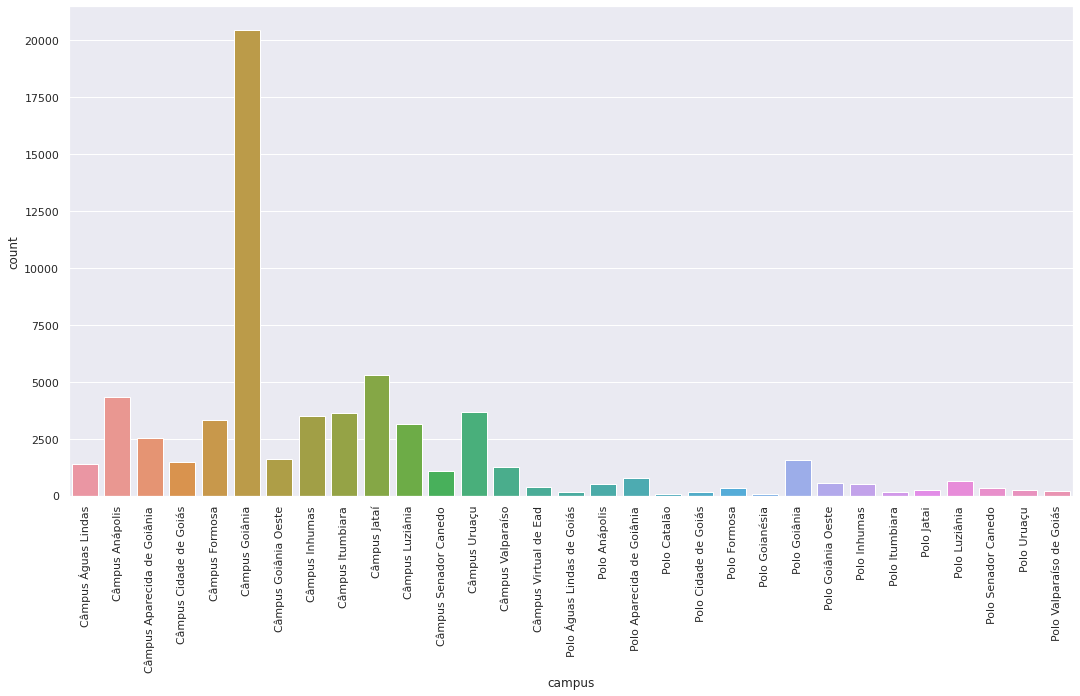

In [15]:
plot_count(df, 'campus')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


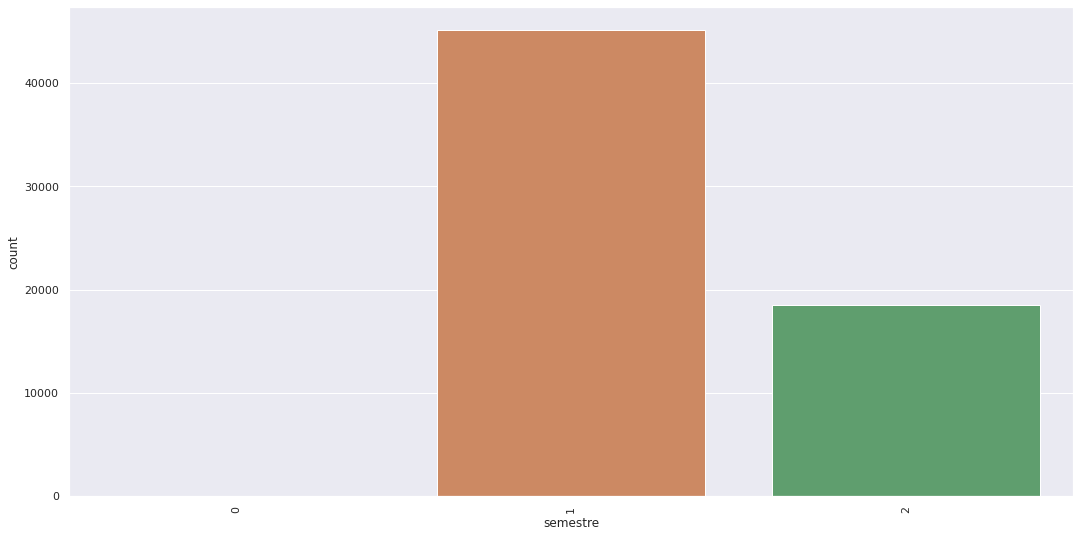

In [16]:
plot_count(df, 'semestre')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


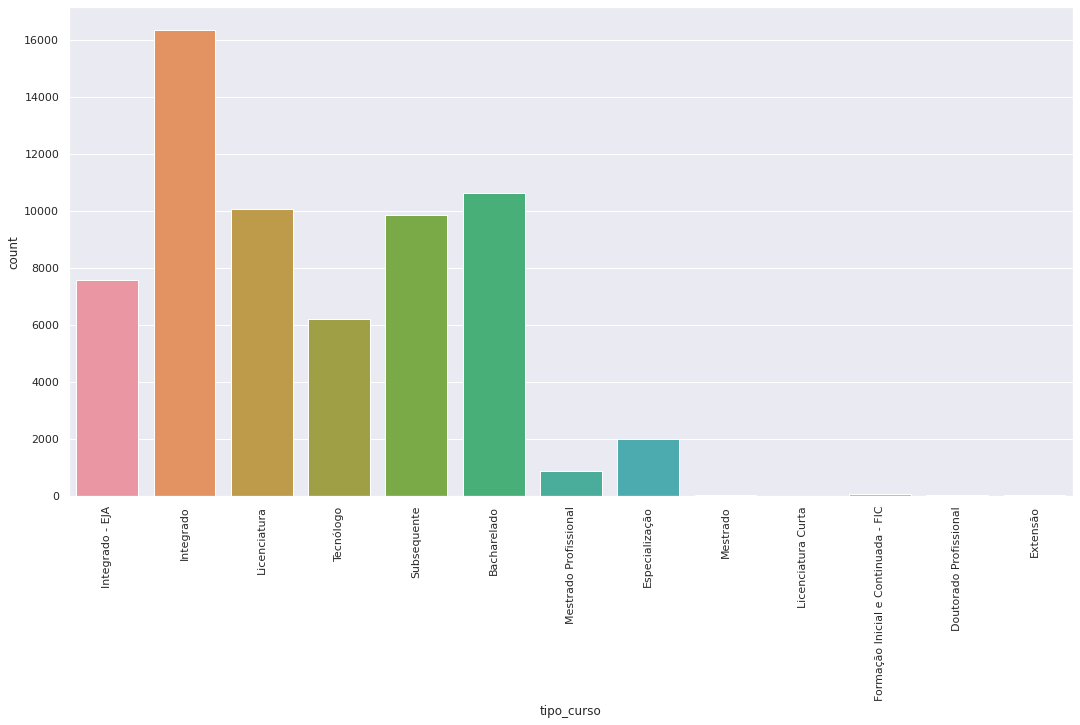

In [17]:
plot_count(df, 'tipo_curso')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


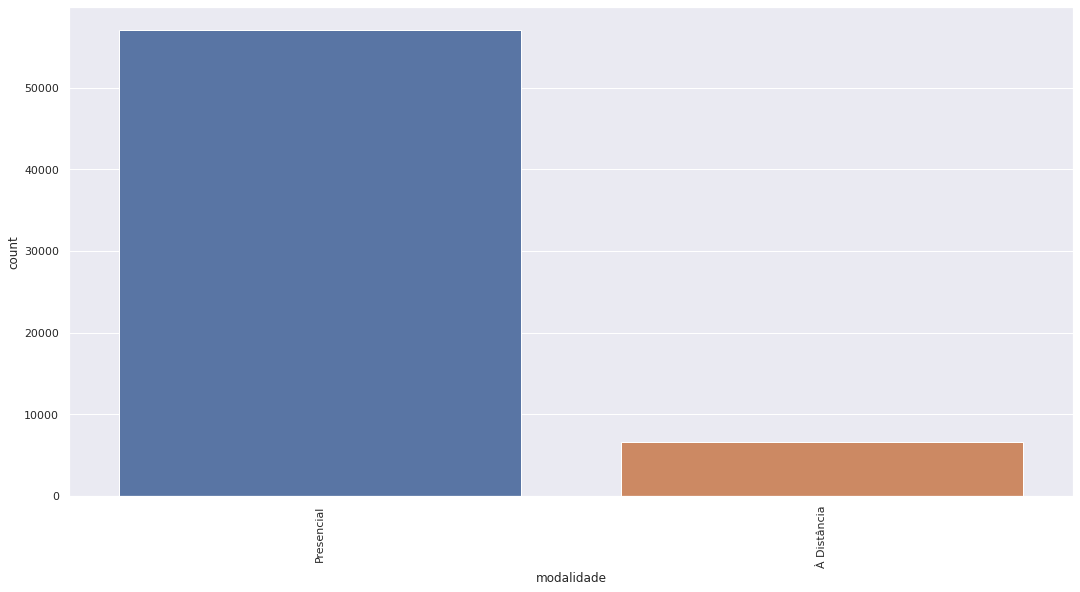

In [18]:
plot_count(df, 'modalidade')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


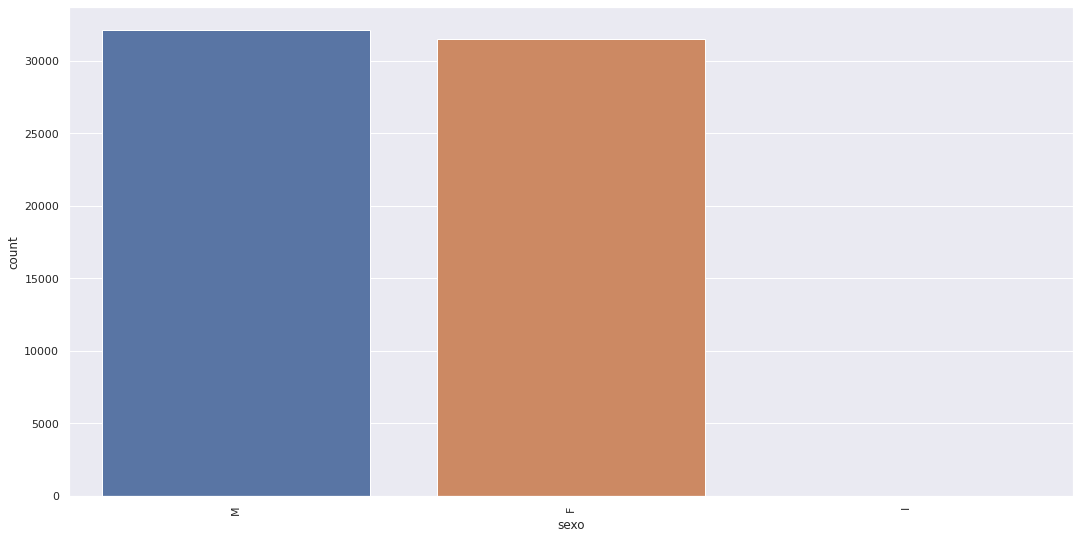

In [19]:
plot_count(df, 'sexo')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


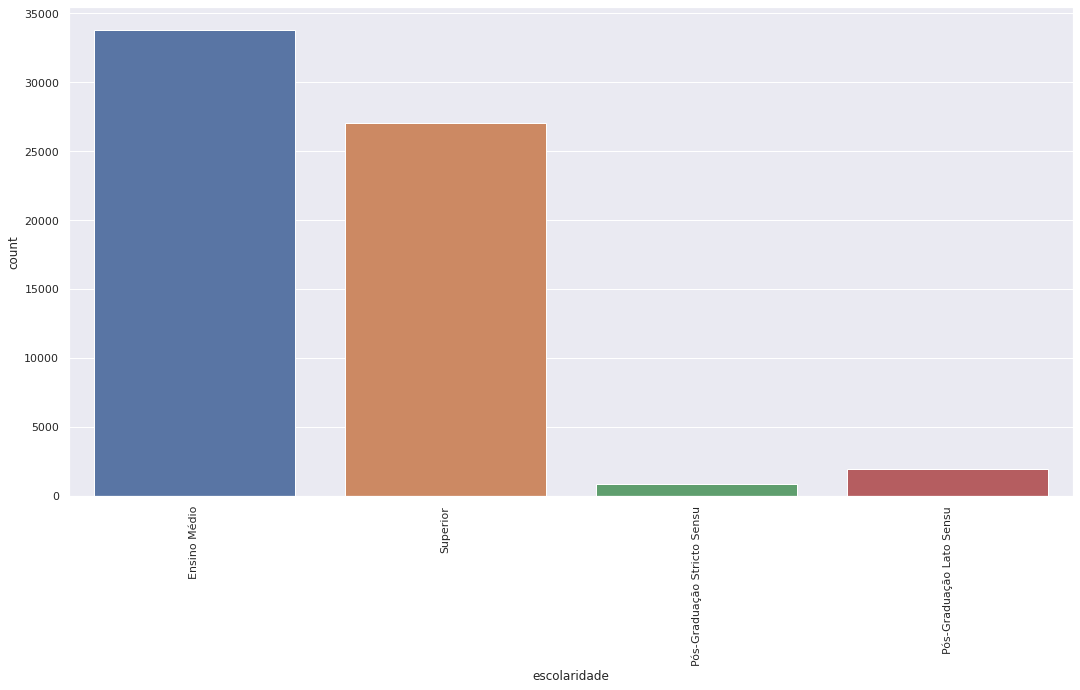

In [20]:
plot_count(df, 'escolaridade')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


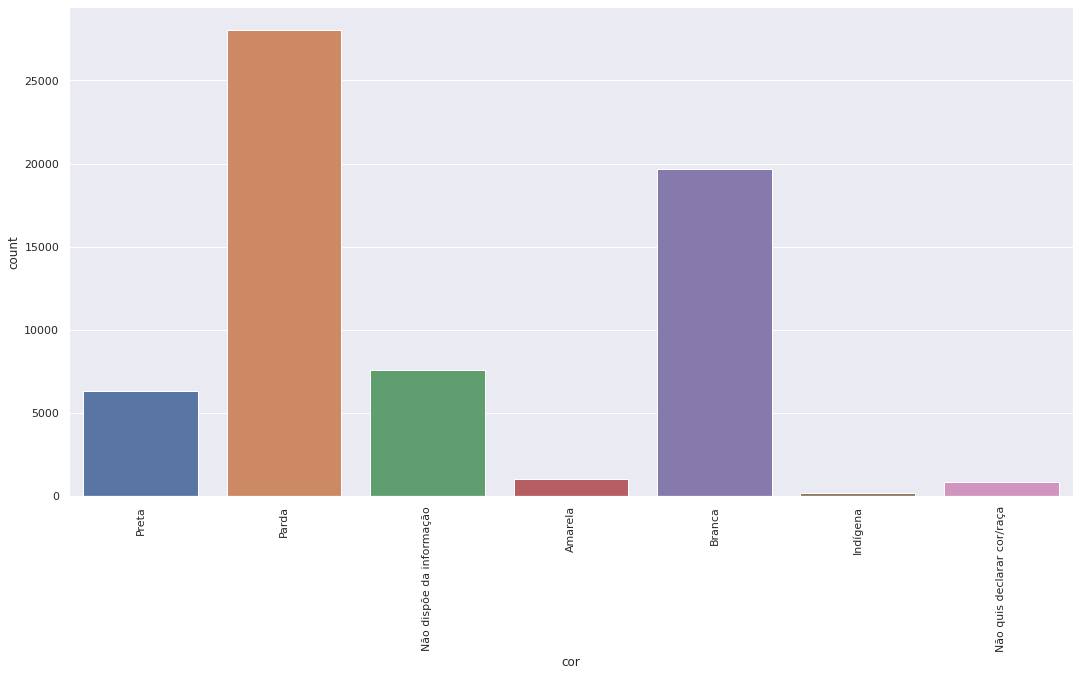

In [21]:
plot_count(df, 'cor')


/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


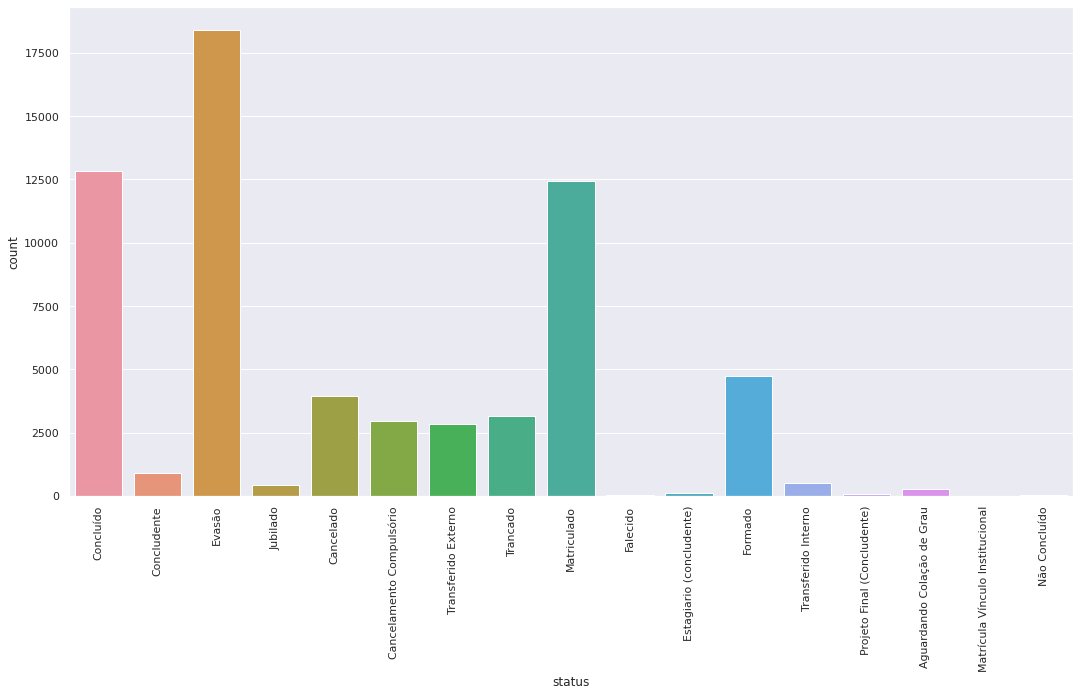

In [22]:
plot_count(df, 'status')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


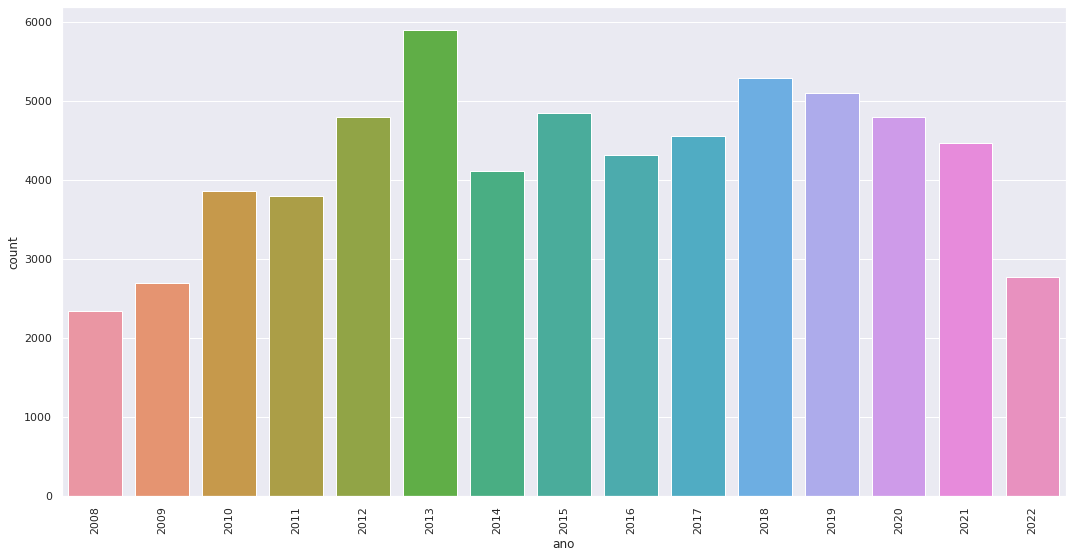

In [23]:
plot_count(df, 'ano')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


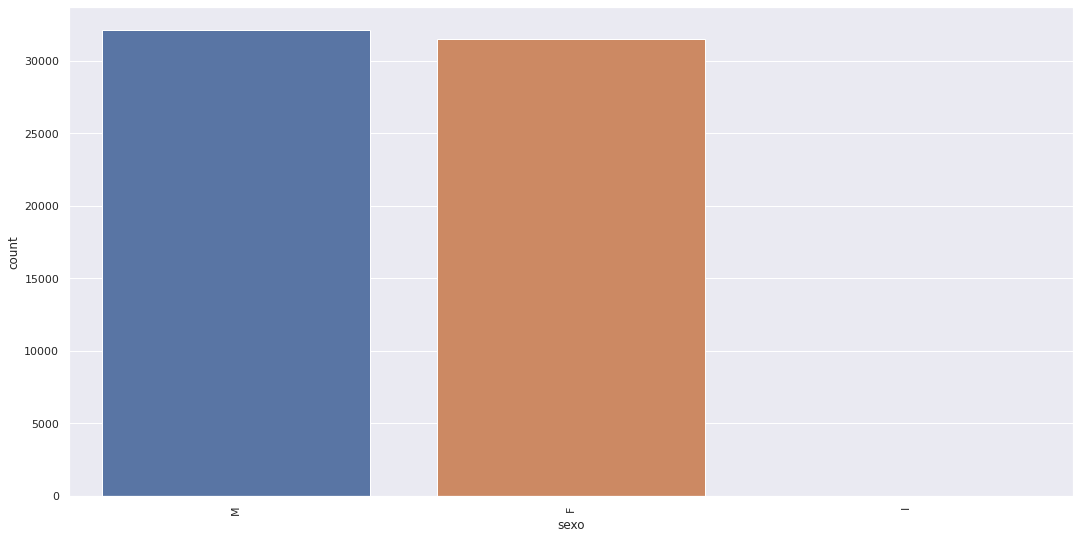

In [24]:
plot_count(df, 'sexo')

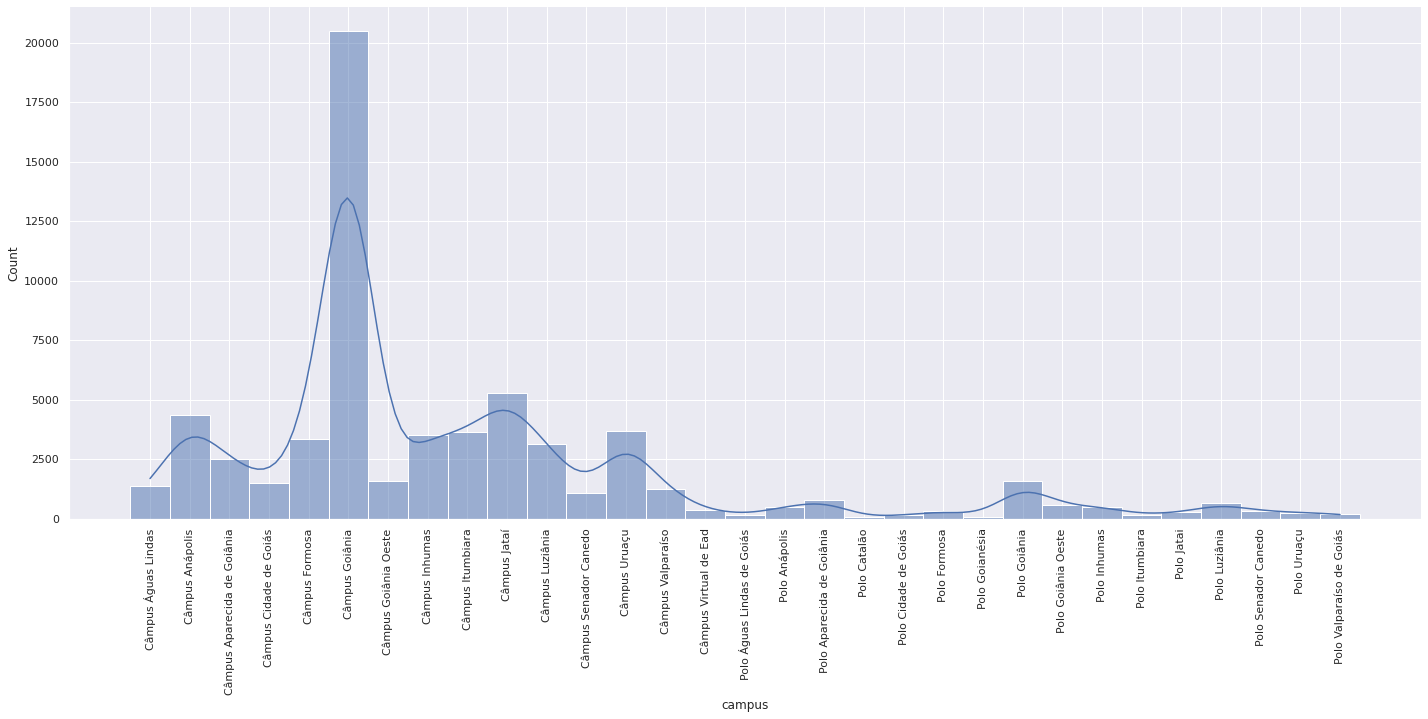

In [25]:
sns.displot(df['campus'], kde=True, height=8, aspect=2.5)
plt.xticks(rotation=90)
plt.show()

(1940.0, 2022.0)

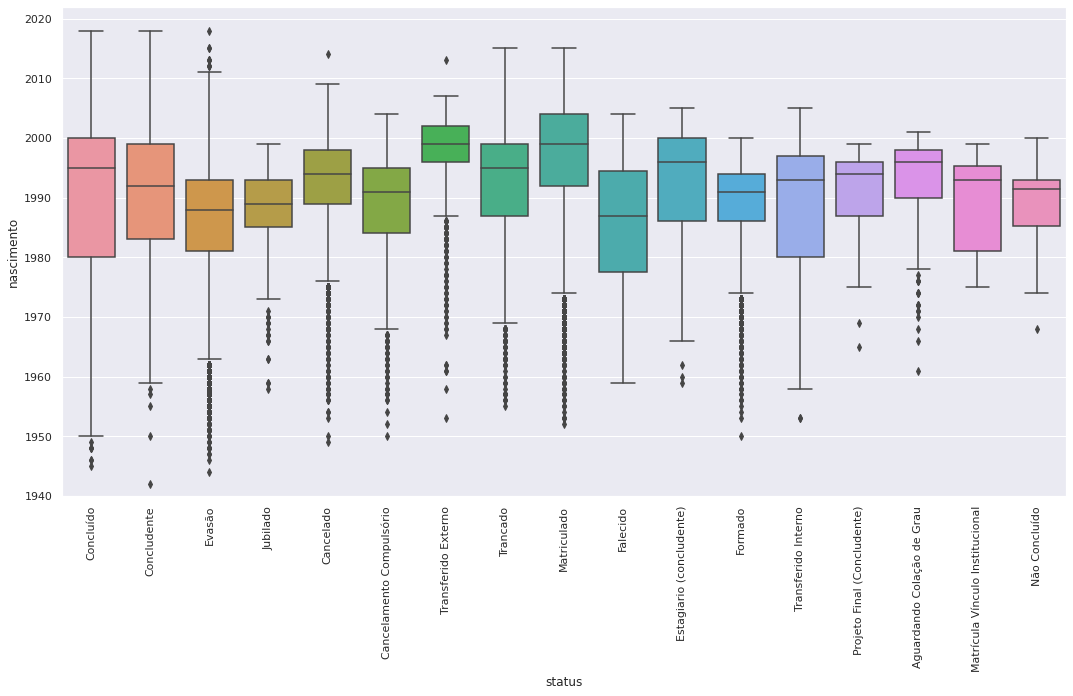

In [26]:
ax = sns.boxplot(x=df['status'],y=df['nascimento'])
plt.xticks(rotation=90)
plt.ylim([1940,2022])

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


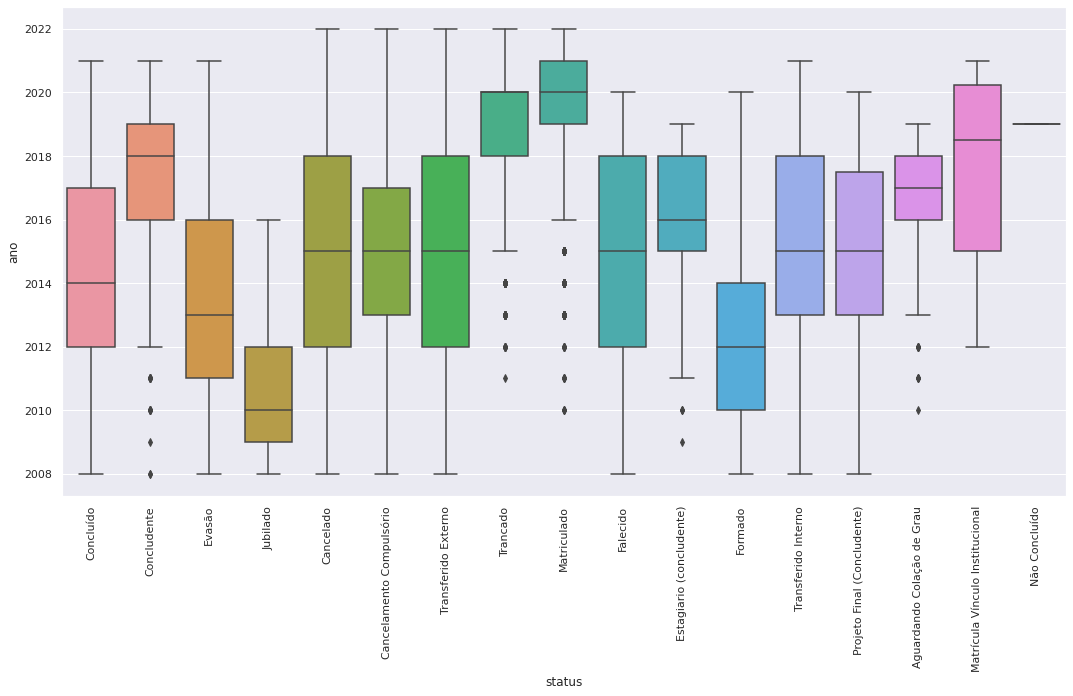

In [27]:
ax = sns.boxplot(df['status'],df['ano'])
plt.xticks(rotation=90);

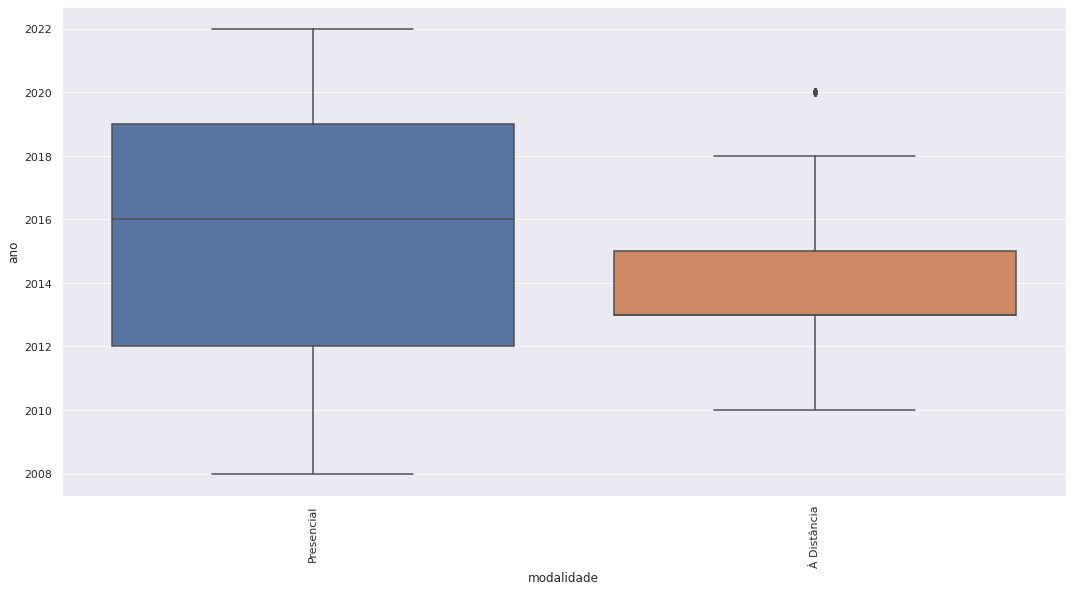

In [28]:
ax = sns.boxplot(x=df['modalidade'],y=df['ano'])
plt.xticks(rotation=90);

/home/filipe/.local/lib/python3.8/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/home/filipe/.local/lib/python3.8/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


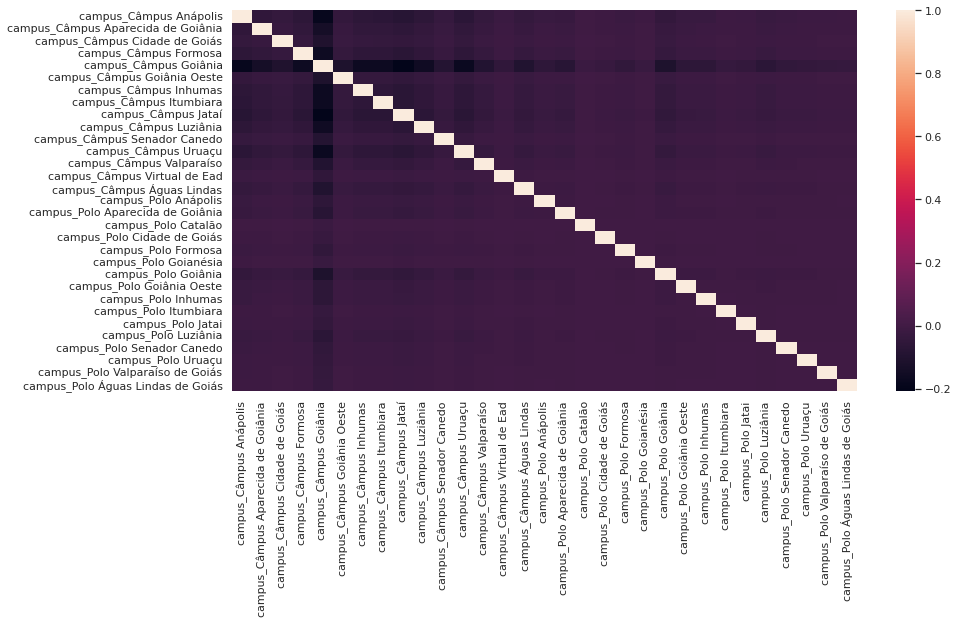

In [29]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
campus = [x  for x in df_posprocessing.keys() if 'campus' in x]
sns.set(rc={"figure.figsize":(14, 7)}) 

sns.heatmap(df_posprocessing[status + campus].corr());

/home/filipe/.local/lib/python3.8/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/home/filipe/.local/lib/python3.8/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


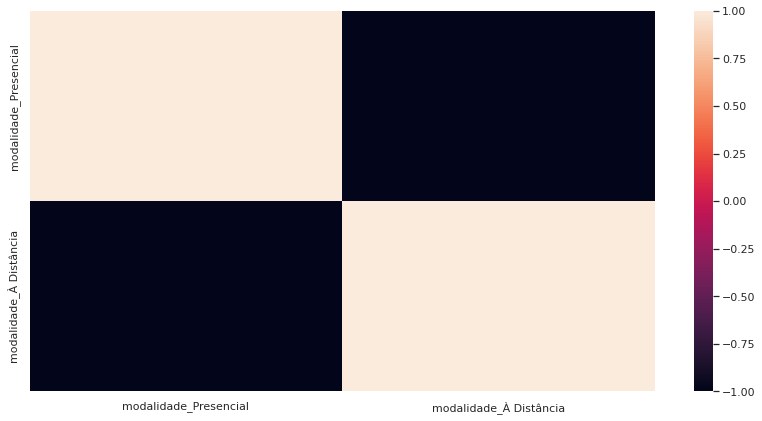

In [30]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
modalidade = [x  for x in df_posprocessing.keys() if 'modalidade' in x]
sns.heatmap(df_posprocessing[status+modalidade].corr());

(2005.0, 2025.0)

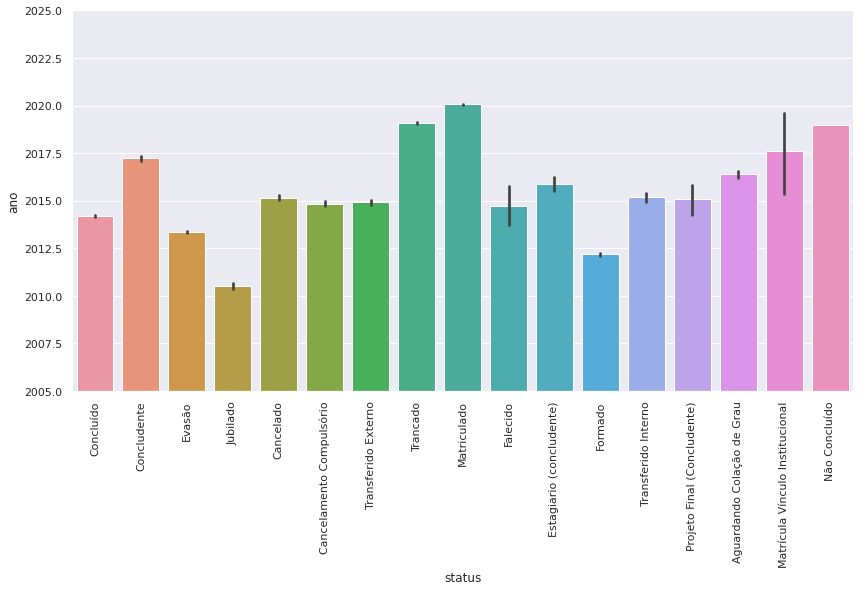

In [31]:
ax = sns.barplot(y="ano", x="status", data=df)
plt.xticks(rotation=90)
plt.ylim([2005,2025])

/home/filipe/.local/lib/python3.8/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/home/filipe/.local/lib/python3.8/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


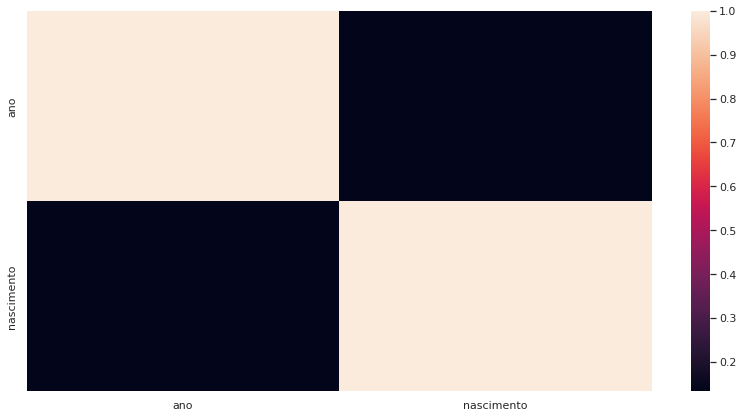

In [32]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
sns.heatmap(df_posprocessing[['ano','nascimento']+status].corr());

In [33]:
distancia = df[df['modalidade'] == 'À Distância']
presencial = df[df['modalidade'] != 'À Distância']

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


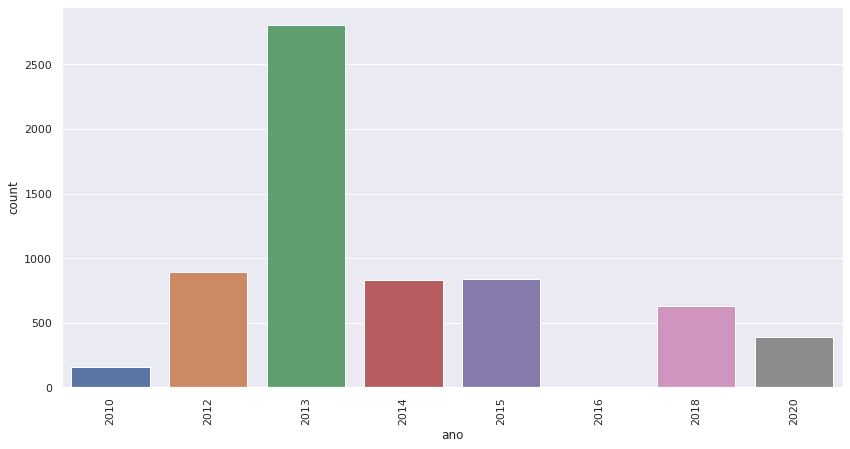

In [34]:
plot_count(distancia, 'ano')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


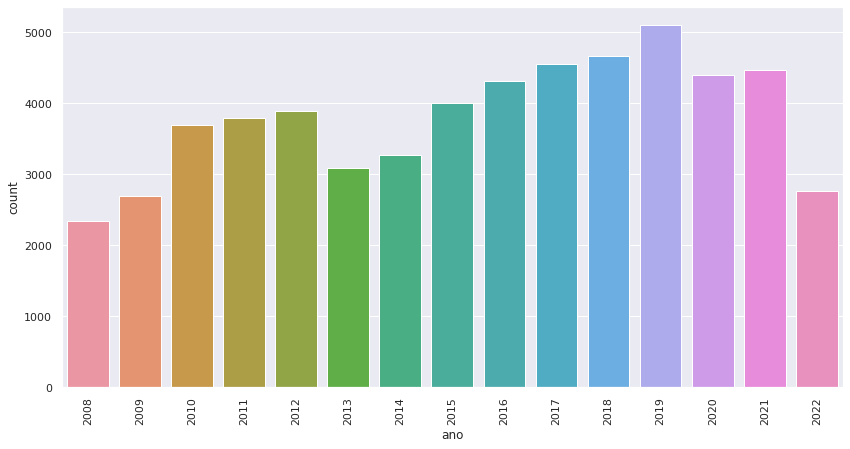

In [35]:
plot_count(presencial, 'ano')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


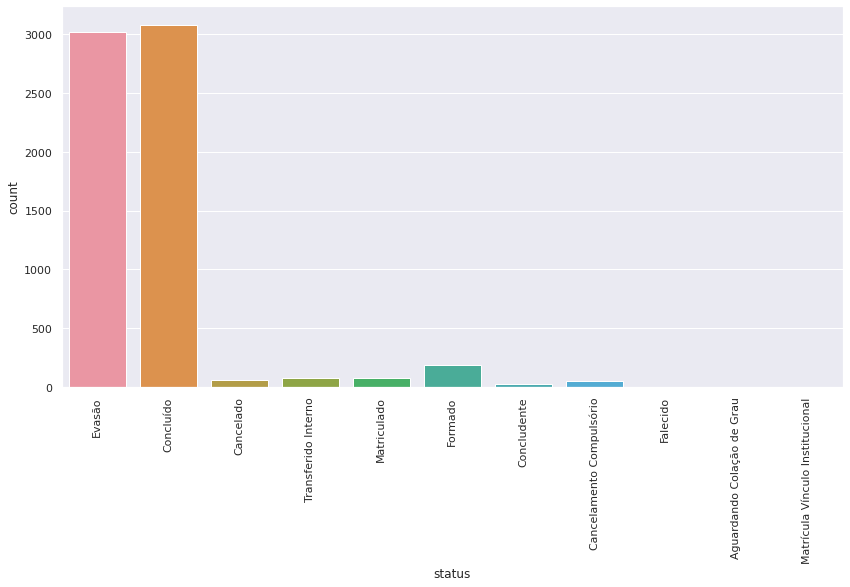

In [36]:
plot_count(distancia, 'status')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


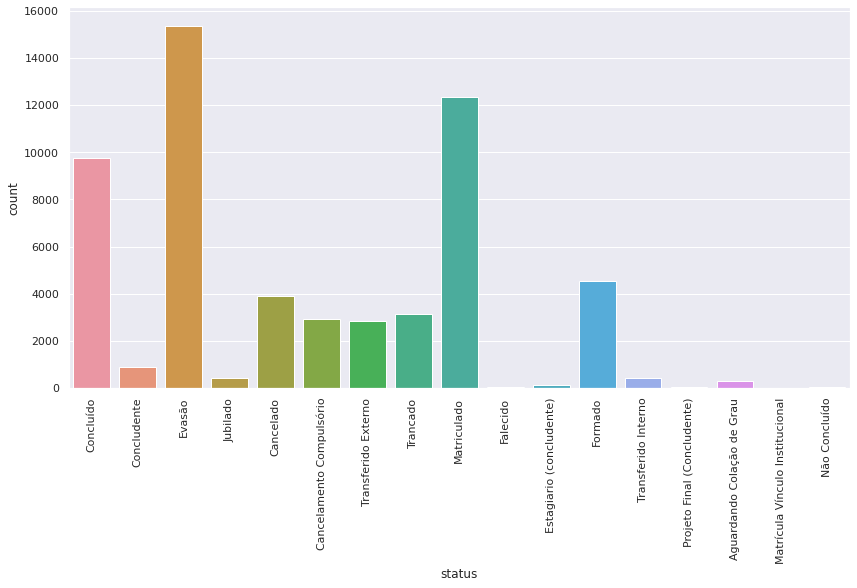

In [37]:
plot_count(presencial, 'status')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


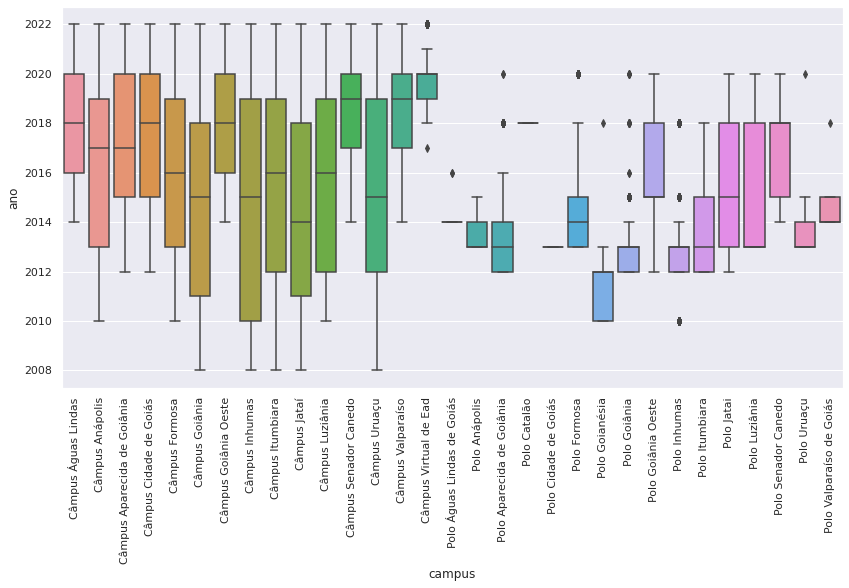

In [38]:
ax = sns.boxplot(df['campus'],df['ano'])
plt.xticks(rotation=90);

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


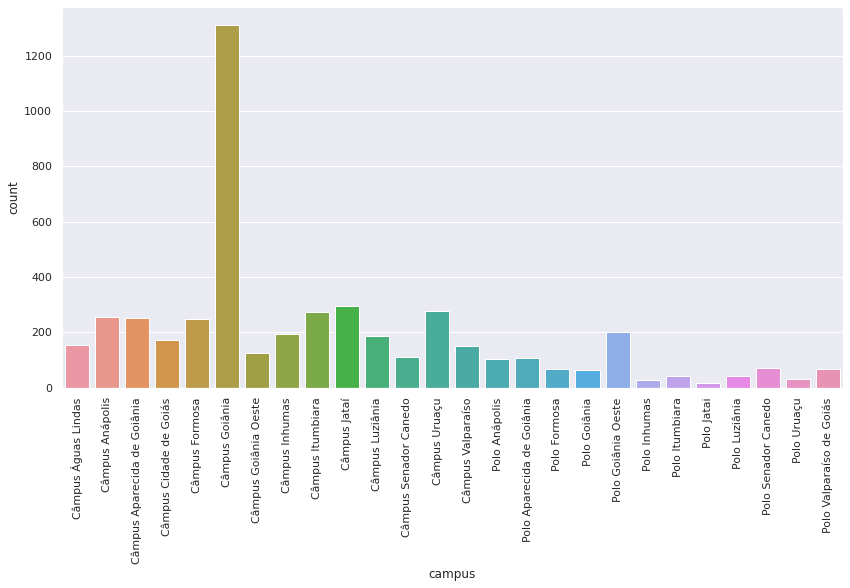

In [39]:
# verificando campus com mais alunos novos em 2013
plot_count(df[df['ano'] == 2015], 'campus')

In [40]:
def entrada_campus(df, campus):
    campus = df[df['campus'] == campus]
    sns.displot(campus['ano'], kde=True, height=8, aspect=2.5)
    plt.xticks(rotation=90)
    plt.show()

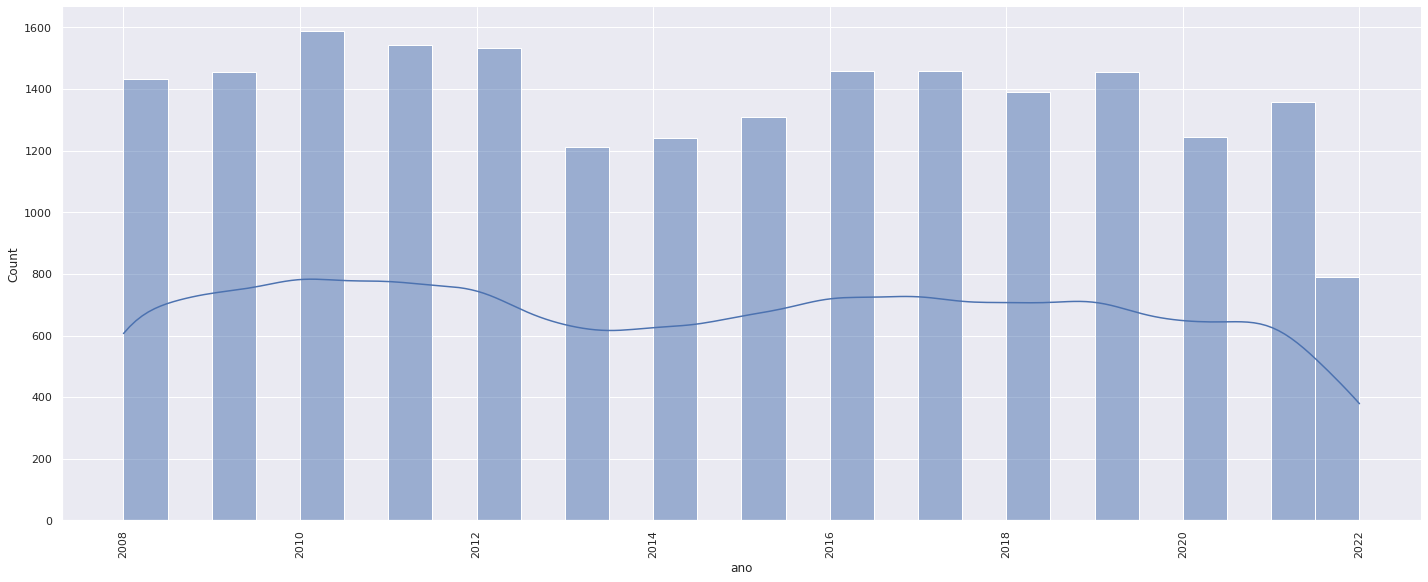

In [41]:
entrada_campus(df, 'Câmpus Goiânia')

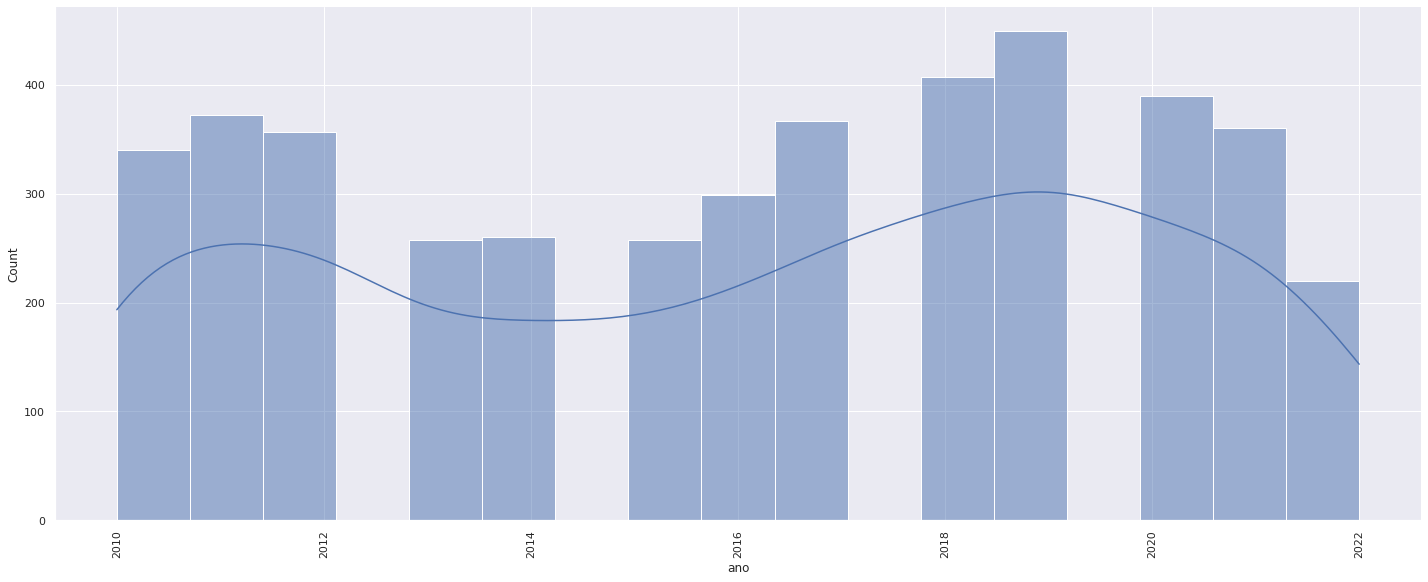

In [42]:
entrada_campus(df, 'Câmpus Anápolis')

In [43]:
evasao = df[df['status'] == 'Evasão']

In [44]:
evasao.count()

campus          18399
ano             18399
semestre        18399
curso           18399
tipo_curso      18399
modalidade      18399
sexo            18399
escolaridade    18399
cor             18399
nascimento      18399
status          18399
renda           18399
dtype: int64

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


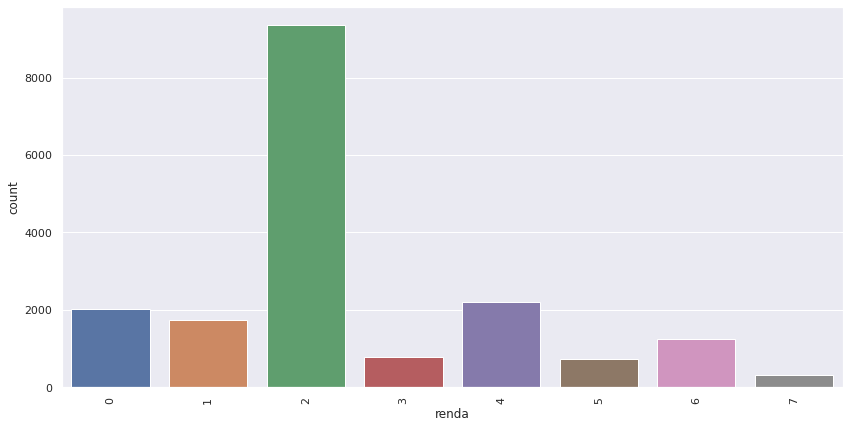

In [45]:
plot_count(evasao, 'renda')

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


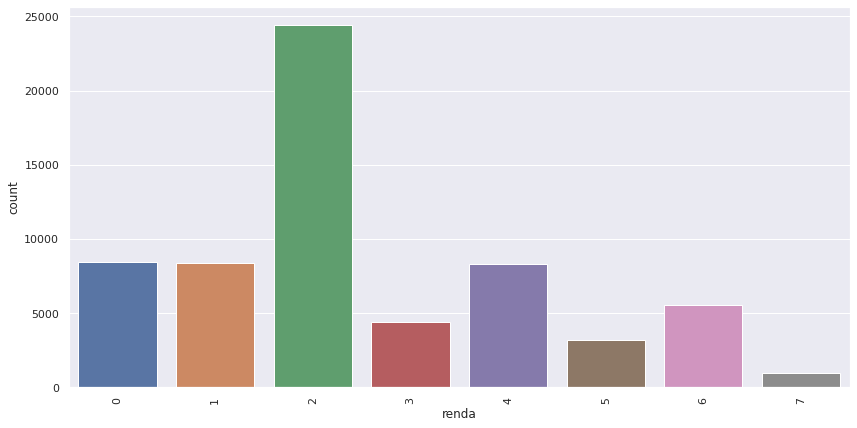

In [46]:
plot_count(df, 'renda')

In [47]:
classes

['1 Sm < Rfp <= 1,5 Sm',
 '1,5 Sm < Rfp <= 2,5 Sm',
 'Não Informado',
 'Rfp <= 0,5 Sm',
 '0,5 Sm < Rfp <= 1 Sm',
 '2,5 Sm < Rfp <= 3 Sm',
 'Rfp > 3 Sm',
 'Não Declarado']

## Questões a serem respondidas:

> Em escala qual o curso que teve maior aumento da taxa de evasão no decorrer do tempo?

In [48]:
query_df = lambda df, column, query: df[df[column] == query]

def taxa_evasao_ano(df, campus):
    campus = query_df(df, 'campus', campus)
    
    taxa_evasao = {}
    for ano in campus['ano'].unique():
        taxa = query_df(campus, 'ano', ano)
        taxa_evasao[ano] = query_df(taxa, 'status', 'Evasão').shape[0] / taxa.shape[0] * 100

    return taxa_evasao


In [49]:
def generete_color():
    return float(f'{random():0.1f}'), float(f'{random():0.1f}'), float(f'{random():0.1f}')

def plot_taxa(x, y, color, label):
    x = np.array(x)
    y = np.array(y)
 
    x_new = np.linspace(x.min(), x.max(), 200)

    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)

    plt.plot(
        x_new,
        y_smooth,
        color=color,
        label=label
    )

    plt.scatter(x, y, color=color)
    
    plt.xlabel('Ano')
    plt.ylabel('Taxa de Evasão (%)')
    
    plt.legend()

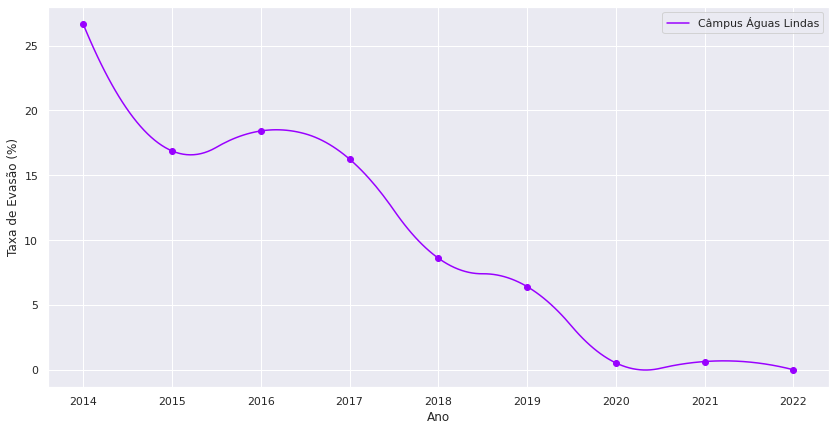

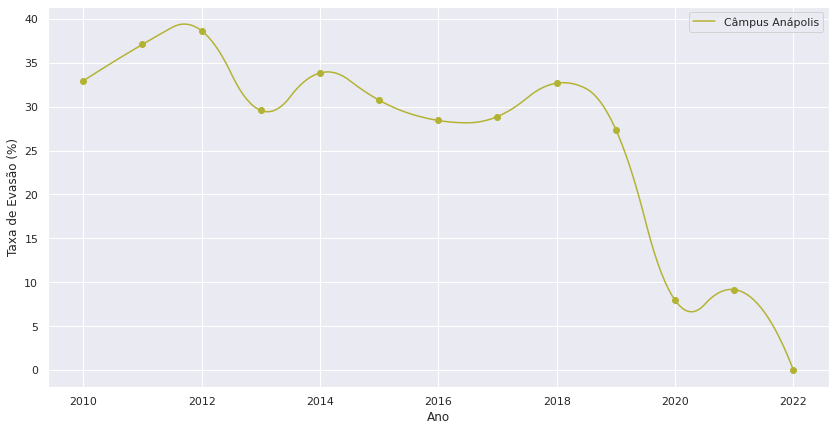

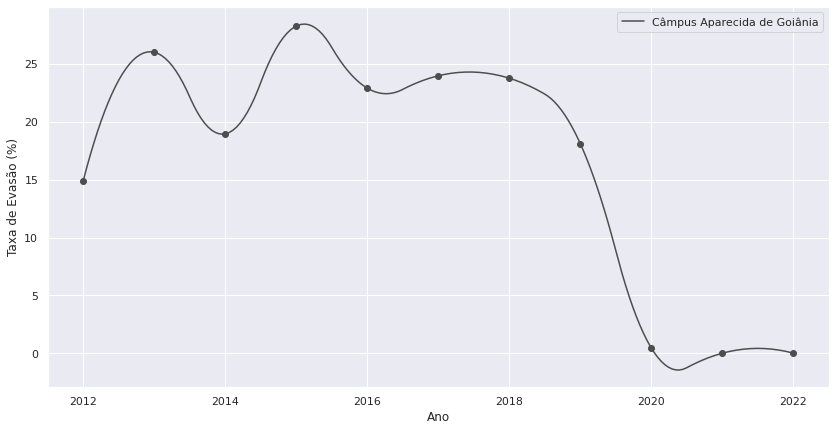

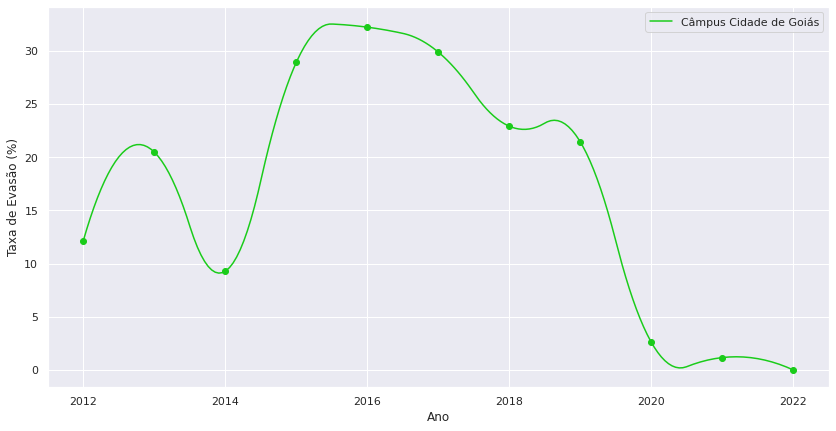

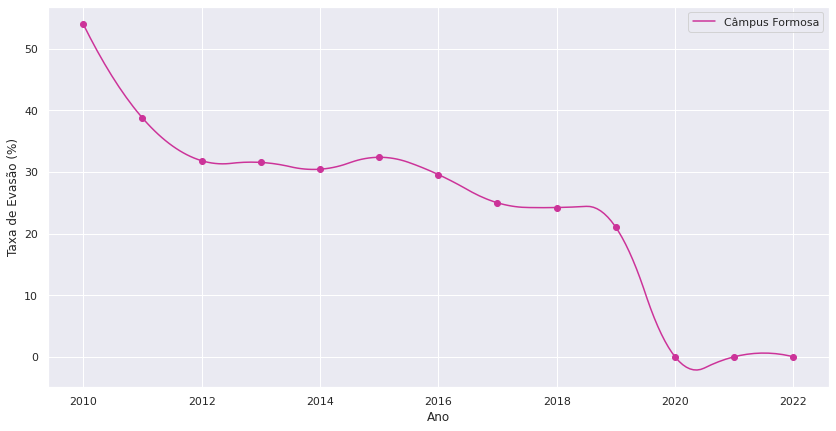

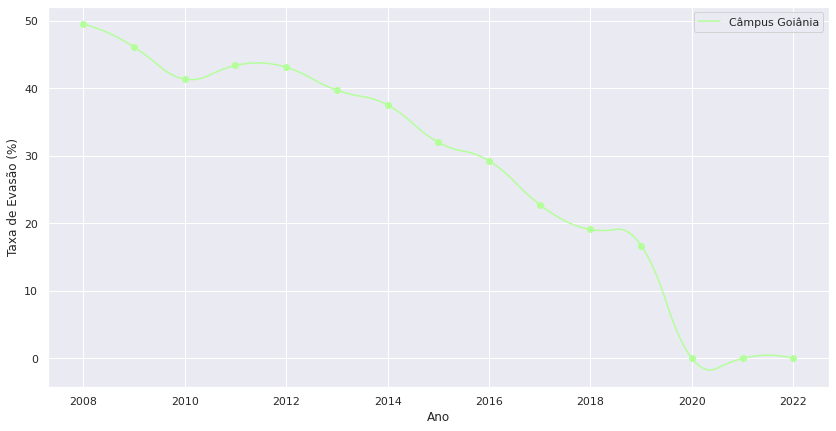

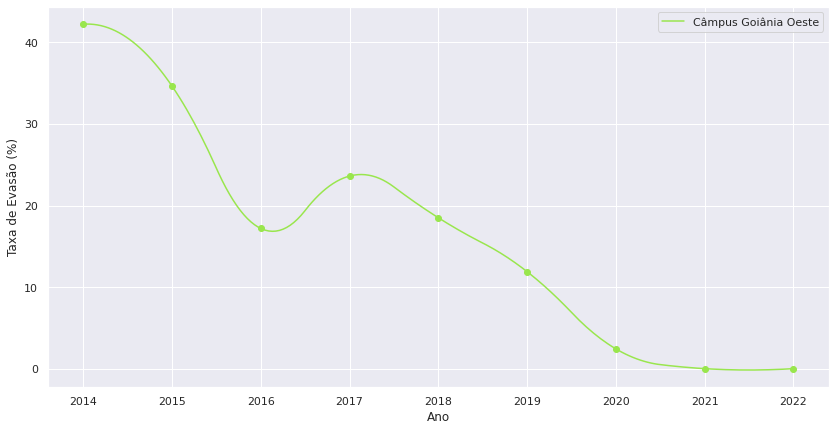

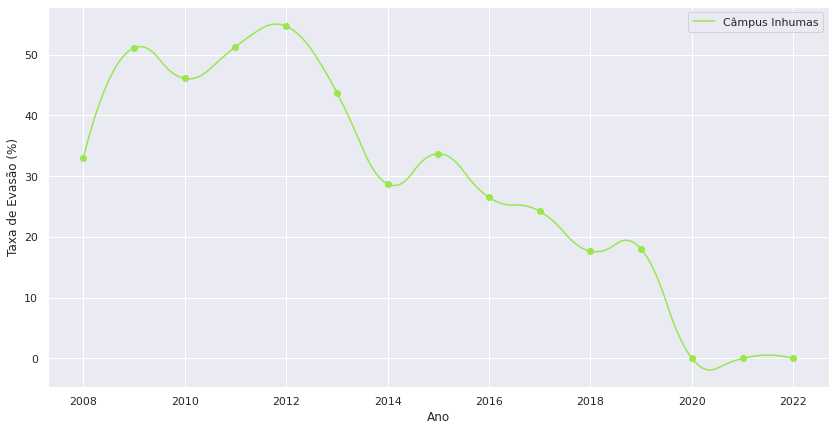

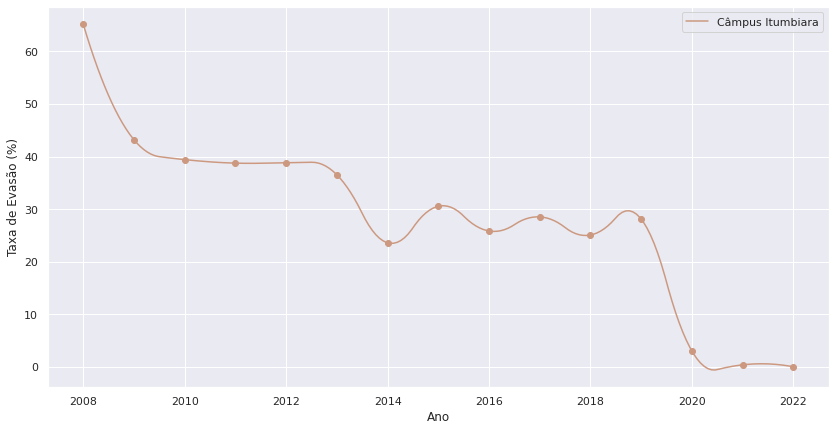

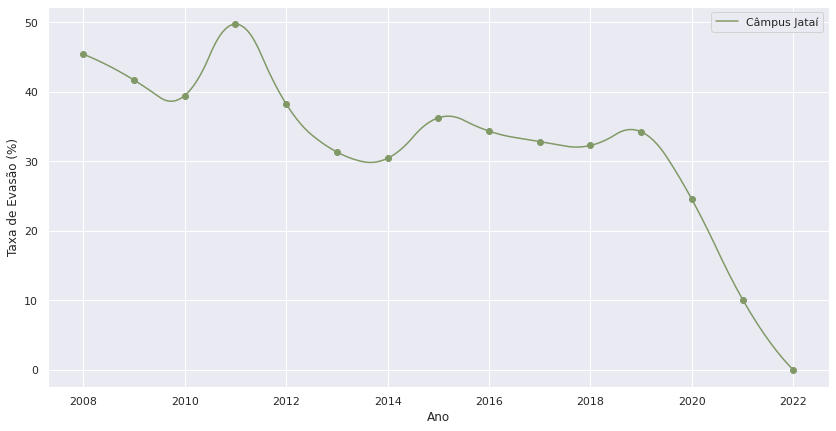

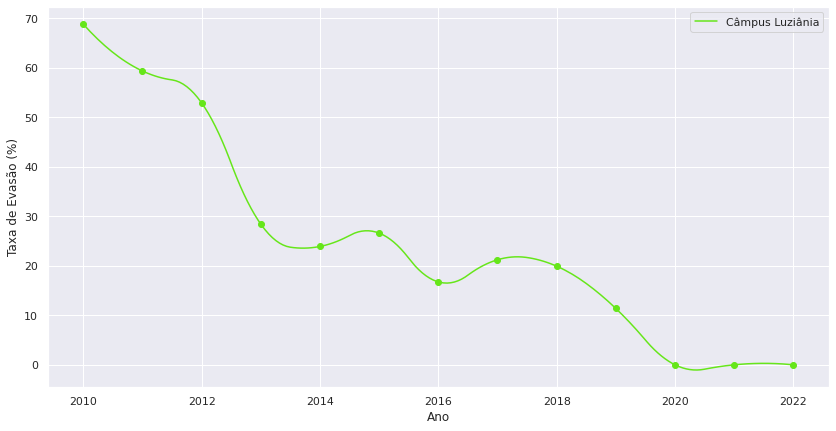

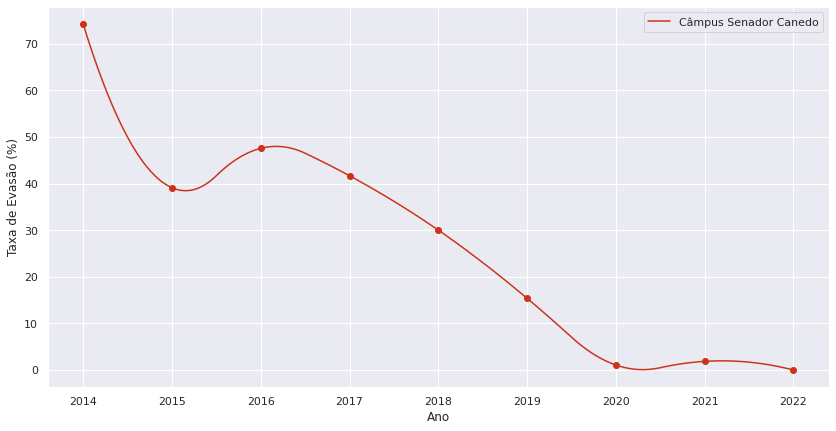

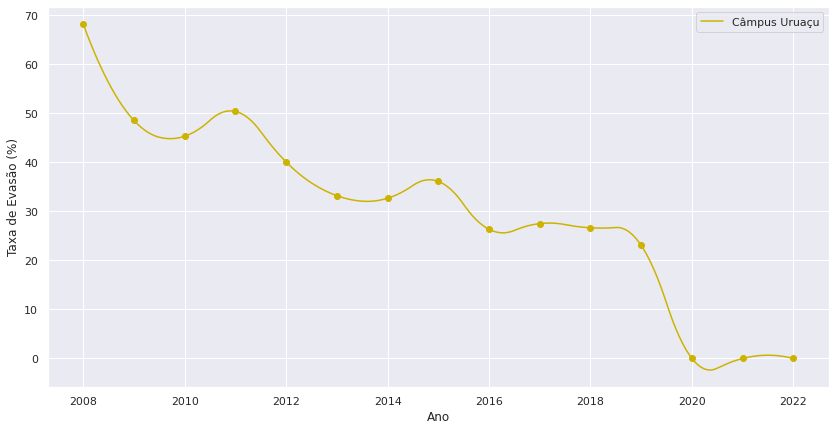

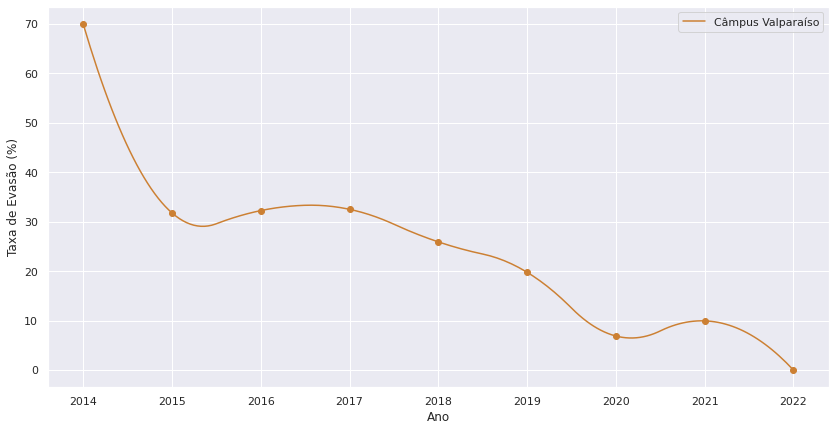

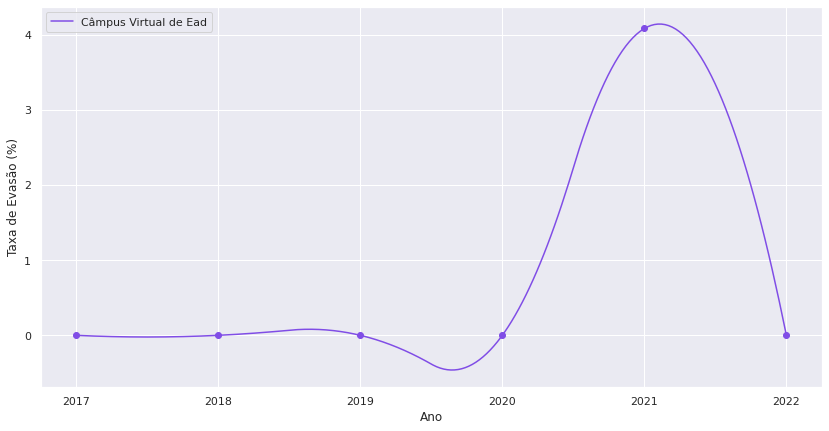

In [50]:
campus = presencial['campus'].unique()

taxa_campus = {}
for cam in campus:
    taxa_campus[cam] = taxa_evasao_ano(presencial, cam)
    x = list(taxa_campus[cam].keys())
    y = list(taxa_campus[cam].values())
    plot_taxa(
        x,
        y,
        color=generete_color(),
        label=cam
    )
    plt.show() # comentar essa linha para comparar todos os campus

### A taxa de evasão apresenta discrepancia dentre os alunos de diferentes etnias?

In [51]:
query_df = lambda df, column, query: df[df[column] == query]

def taxa_evasao_raca(df):
    # campus = query_df(df, 'cor', campus)
    
    taxa_evasao = {}
    for cor in df['cor'].unique():
        taxa = query_df(df, 'cor', cor)
        taxa_evasao[cor] = query_df(taxa, 'status', 'Evasão').shape[0] / taxa.shape[0] * 100

    return taxa_evasao

raca_taxa_evasao = taxa_evasao_raca(presencial)
# print(raca_taxa_evasao)
# raca_taxa_evasao = pd.DataFrame(raca_taxa_evasao)
raca_taxa_evasao

{'Preta': 26.412239408204442,
 'Parda': 26.365428472034324,
 'Não dispõe da informação': 42.52091032872982,
 'Amarela': 29.13553895410886,
 'Branca': 23.818034118602764,
 'Indígena': 28.205128205128204,
 'Não quis declarar cor/raça': 16.39344262295082}

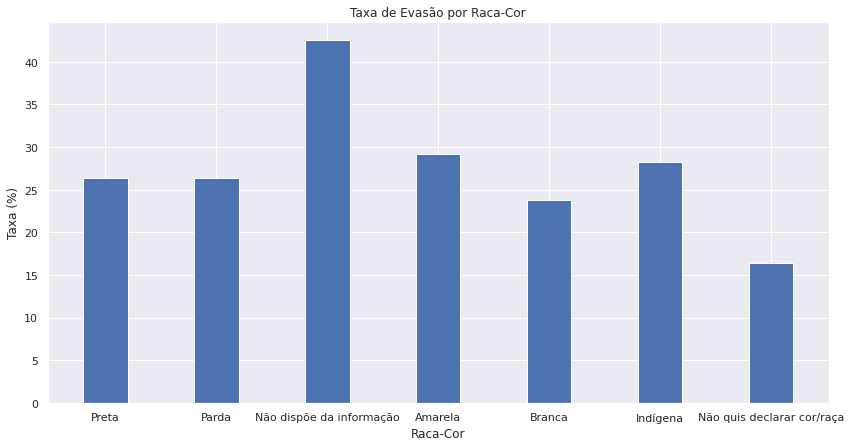

In [52]:
courses = list(raca_taxa_evasao.keys())
values = list(raca_taxa_evasao.values())

# creating the bar plot
plt.bar(courses, values, width = 0.4)

plt.xlabel("Raca-Cor")
plt.ylabel("Taxa (%)")
plt.title("Taxa de Evasão por Raca-Cor")
plt.show()

/home/filipe/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


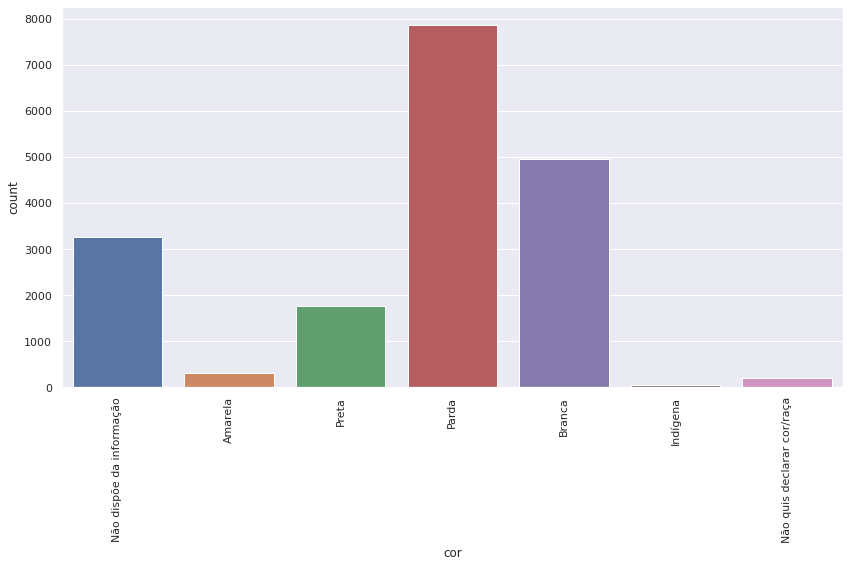

In [53]:
plot_count(evasao, 'cor')

## Clustering

In [54]:
"""TODO:
- Aplicar o K-mean e DBSCAN para as features:
       - Ano de ingresso do aluno
       - Escolaridade
              - Aplicar one-hot-encodding
       - Renda percápita    
       - Dta. Nascimento

- Avaliar os resultados com a métrica Silhuette
"""

'TODO:\n- Aplicar o K-mean e DBSCAN para as features:\n       - Ano de ingresso do aluno\n       - Escolaridade\n              - Aplicar one-hot-encodding\n       - Renda percápita    \n       - Dta. Nascimento\n\n- Avaliar os resultados com a métrica Silhuette\n'

In [55]:
def cluester(X, model=None, params={}):
       return model(**params).fit(X)

In [56]:
cluester_df = evasao[['ano', 'nascimento', 'renda']]

escolaridade = pd.get_dummies(evasao[['escolaridade']])

cluester_df[escolaridade.columns] = escolaridade
del escolaridade

X = cluester_df.values

dbscan_model = cluester(
                X,
                model=DBSCAN,
                params={
                    'eps': 10,
                    'min_samples': 5
                })

kmeans_model = cluester(
                X,
                model=KMeans,
                params={
                    'n_clusters': 23,
                    'random_state': 10
                })
results_db = silhouette_score(X, dbscan_model.labels_)
results_km = silhouette_score(X, kmeans_model.labels_)
results_db, results_km

/home/filipe/.local/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(0.8473769898689578, 0.2426080260731389)

In [57]:
cluester_df_2 = pd.get_dummies(evasao[['campus', 'curso', 'tipo_curso', 'modalidade', 'sexo', 'cor']])


X_2 = cluester_df_2.values

# dbscan_model = cluester(
#                     X_2,
#                     model=DBSCAN,
#                     params={
#                         'eps': 15,
#                         'min_samples': 2
#                     })
                    
# results_db_2 = silhouette_score(X_2, dbscan_model.labels_)


kmeans_model = cluester(
                X_2,
                model=KMeans,
                params={
                    'n_clusters': 6,
                    'random_state': 10
                })
    
results_km_2 = silhouette_score(X_2, kmeans_model.labels_)
results_km_2

0.1129596675791152

In [58]:
def plot_cluster(X, model, params):
    pca = PCA(n_components=2)
    result_pca = pca.fit_transform(X)
    result_pca = pd.DataFrame(result_pca)

    plt.scatter(result_pca[0], result_pca[1], alpha=.3, color='gold')
    plt.title("DIstribution with PCA")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()
    

    model = model(**params)
    model.fit(result_pca.iloc[:,:2])

    labels = model.predict(result_pca.iloc[:,:2])
    plt.scatter(result_pca[0], result_pca[1], c=labels)
    plt.title("Cluesters with PCA")
    plt.show()

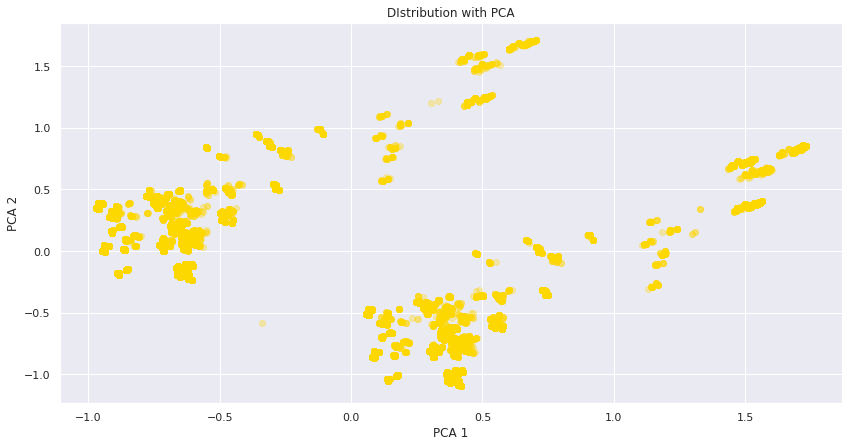

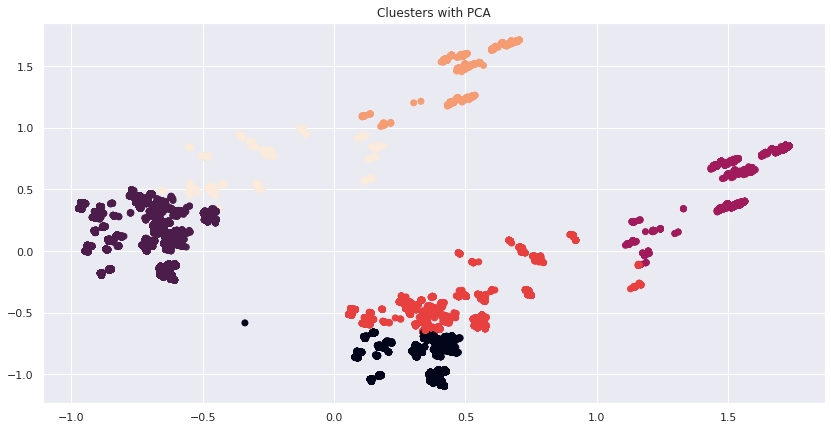

In [59]:
plot_cluster(
    X_2,
    KMeans,
    {
        'n_clusters': 6,
        'random_state': 10
    }
)

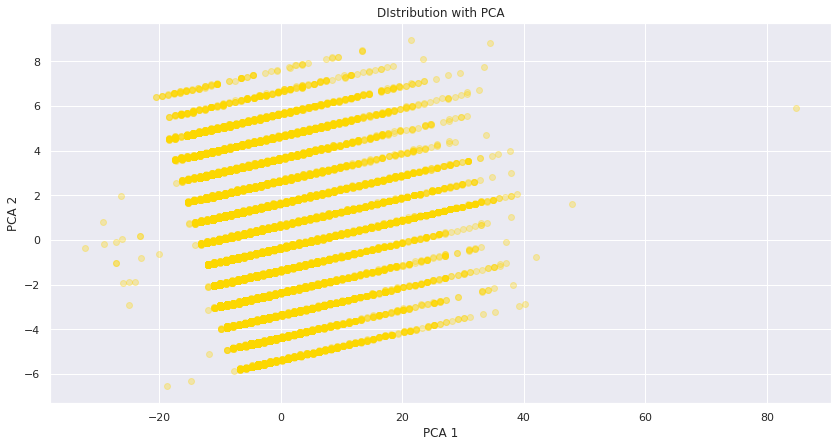

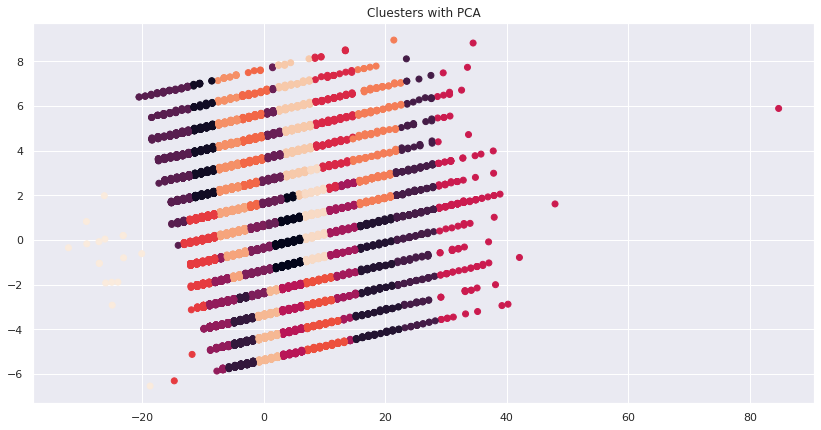

In [60]:
plot_cluster(
    X,
    KMeans,
    {
        'n_clusters': 23,
        'random_state': 10
    }
)

## Alnos concluintes:

In [61]:
concluido = df[df['status'] == 'Concluído']

In [62]:
cluester_df = concluido[['ano', 'nascimento', 'renda']]

escolaridade = pd.get_dummies(concluido[['escolaridade']])

cluester_df[escolaridade.columns] = escolaridade
del escolaridade

X = cluester_df.values

dbscan_model = cluester(
                X,
                model=DBSCAN,
                params={
                    'eps': 10,
                    'min_samples': 5
                })

kmeans_model = cluester(
                X,
                model=KMeans,
                params={
                    'n_clusters': 30,
                    'random_state': 10
                })
results_km = silhouette_score(X, kmeans_model.labels_)

results_db = silhouette_score(X, dbscan_model.labels_)
results_db, results_km

/home/filipe/.local/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(0.7788675588295438, 0.31626939487543315)

In [63]:
cluester_df_2 = pd.get_dummies(concluido[['campus', 'curso', 'tipo_curso', 'modalidade', 'sexo', 'cor']])


X_2 = cluester_df_2.values

# dbscan_model = cluester(
#                     X_2,
#                     model=DBSCAN,
#                     params={
#                         'eps': 15,
#                         'min_samples': 2
#                     })
                    
# results_db_2 = silhouette_score(X_2, dbscan_model.labels_)


kmeans_model = cluester(
                X_2,
                model=KMeans,
                params={
                    'n_clusters': 15,
                    'random_state': 10
                })
    
results_km_2 = silhouette_score(X_2, kmeans_model.labels_)
results_km_2

0.12983491016890983

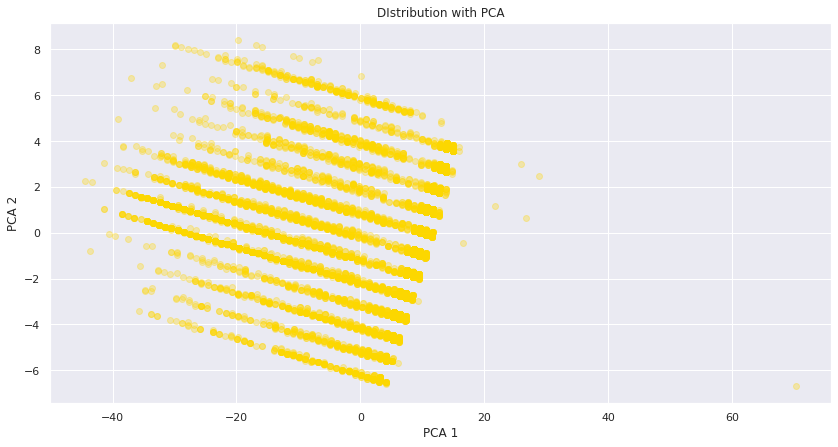

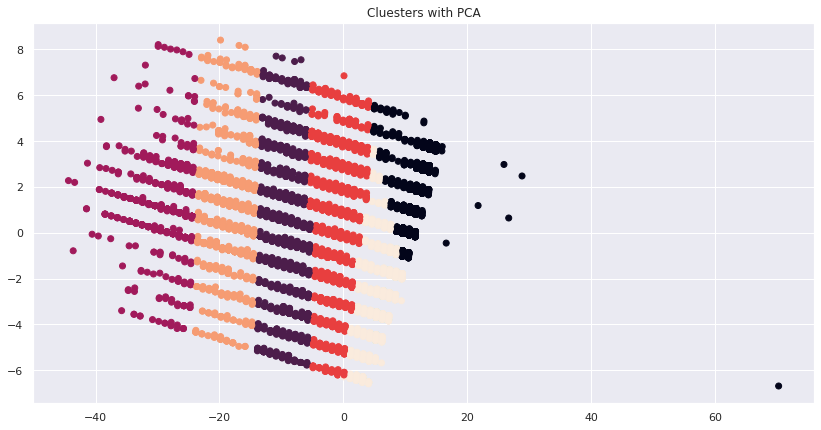

In [64]:
plot_cluster(
    X,
    model=KMeans,
    params={
        'n_clusters': 6,
        'random_state': 10
    }
)

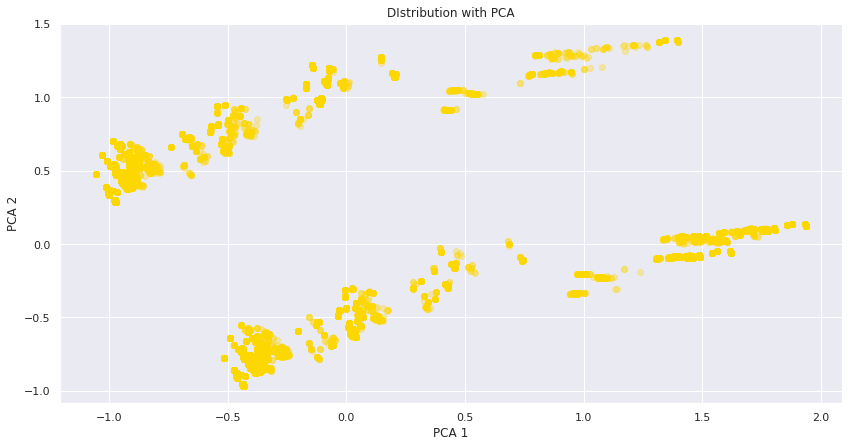

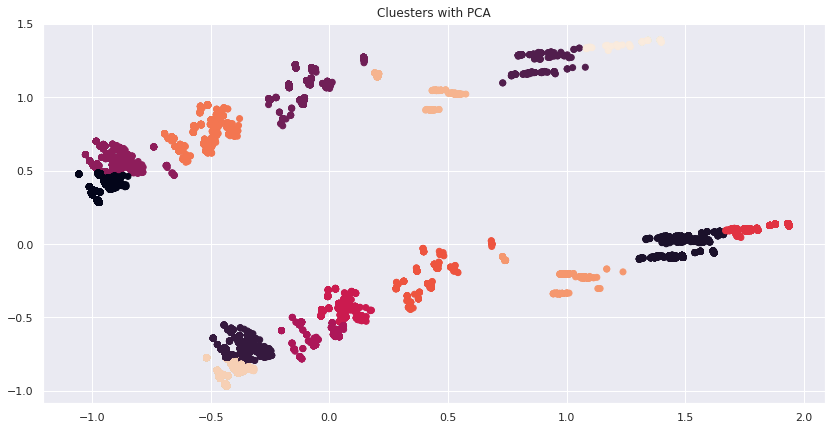

In [65]:
plot_cluster(
    X_2,
    KMeans,
    {
        'n_clusters': 15,
        'random_state': 10
    }
)

## Regras de Associação

In [66]:
computacao = df[df['curso'] == 'Bacharelado em Ciência da Computação']

computacao[['semestre', 'renda']] = computacao[['semestre', 'renda']].astype(str)

computacao = pd.get_dummies(computacao[['semestre', 'modalidade', 'sexo', 'renda', 'cor', 'status']])

computacao


X_ar = computacao.values

computacao.info()
X_ar

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 3236 to 5525
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   semestre_1                       257 non-null    uint8
 1   semestre_2                       257 non-null    uint8
 2   modalidade_Presencial            257 non-null    uint8
 3   sexo_F                           257 non-null    uint8
 4   sexo_M                           257 non-null    uint8
 5   renda_0                          257 non-null    uint8
 6   renda_1                          257 non-null    uint8
 7   renda_2                          257 non-null    uint8
 8   renda_3                          257 non-null    uint8
 9   renda_4                          257 non-null    uint8
 10  renda_5                          257 non-null    uint8
 11  renda_6                          257 non-null    uint8
 12  renda_7                          257 non-null 

/home/filipe/.local/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0]], dtype=uint8)

In [67]:
# computacao

frequent_itemsets = apriori(computacao, min_support=0.01, use_colnames=True)
frequent_itemsets

/home/filipe/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.972763,(semestre_1)
1,0.027237,(semestre_2)
2,1.000000,(modalidade_Presencial)
3,0.128405,(sexo_F)
4,0.871595,(sexo_M)
...,...,...
908,0.023346,"(cor_Parda, renda_4, modalidade_Presencial, se..."
909,0.011673,"(cor_Parda, renda_4, modalidade_Presencial, se..."
910,0.031128,"(cor_Parda, renda_4, modalidade_Presencial, se..."
911,0.046693,"(cor_Parda, renda_4, modalidade_Presencial, se..."


In [68]:
# your code goes here
maximal_frequent_itemsets = frequent_itemsets.copy()

for index, row in frequent_itemsets.iterrows():
    itemset = row['itemsets']
    itemsets_to_compare_with = frequent_itemsets.drop(index)
    for i, r in itemsets_to_compare_with.iterrows():
        if itemset.issubset(r['itemsets']):
            maximal_frequent_itemsets = maximal_frequent_itemsets.drop(index)
            break;
            
print(maximal_frequent_itemsets)
print(maximal_frequent_itemsets.shape)

      support                                           itemsets
251  0.011673  (modalidade_Presencial, semestre_2, status_Mat...
432  0.011673  (renda_0, modalidade_Presencial, sexo_F, semes...
433  0.011673  (modalidade_Presencial, sexo_F, semestre_1, re...
439  0.011673  (modalidade_Presencial, sexo_F, semestre_1, co...
441  0.011673  (modalidade_Presencial, status_Cancelamento Co...
..        ...                                                ...
908  0.023346  (cor_Parda, renda_4, modalidade_Presencial, se...
909  0.011673  (cor_Parda, renda_4, modalidade_Presencial, se...
910  0.031128  (cor_Parda, renda_4, modalidade_Presencial, se...
911  0.046693  (cor_Parda, renda_4, modalidade_Presencial, se...
912  0.015564  (cor_Parda, renda_6, modalidade_Presencial, se...

[70 rows x 2 columns]
(70, 2)


In [69]:
def get_confidence(target='status', min_threshold=0.25,support=0.05):

    if target:
        status_rules = association_rules(
            frequent_itemsets, metric="confidence", min_threshold=min_threshold)
        arr2 = []
        
        
        for index, row in status_rules.iterrows():
            consequents = row['consequents']
            arr = [x for x in consequents if target in x]
            if arr:
                arr2 += [index]
        
        status_rules = status_rules.iloc[arr2]
        return status_rules[status_rules['support'] >= support].sort_values(by=['confidence'], ascending=False)

In [70]:
get_confidence('status',0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2649,"(renda_3, modalidade_Presencial, cor_Branca, s...",(status_Matriculado),0.124514,0.431907,0.073930,0.59375,1.374718,0.020152,1.398384
1814,"(renda_3, cor_Branca)","(modalidade_Presencial, status_Matriculado)",0.124514,0.431907,0.073930,0.59375,1.374718,0.020152,1.398384
1811,"(renda_3, modalidade_Presencial, cor_Branca)",(status_Matriculado),0.124514,0.431907,0.073930,0.59375,1.374718,0.020152,1.398384
2658,"(renda_3, cor_Branca)","(modalidade_Presencial, semestre_1, status_Mat...",0.124514,0.420233,0.073930,0.59375,1.412905,0.021605,1.427118
2655,"(renda_3, cor_Branca, semestre_1)","(modalidade_Presencial, status_Matriculado)",0.124514,0.431907,0.073930,0.59375,1.374718,0.020152,1.398384
...,...,...,...,...,...,...,...,...,...
264,"(renda_1, semestre_1)",(status_Matriculado),0.136187,0.431907,0.054475,0.40000,0.926126,-0.004345,0.946822
918,"(modalidade_Presencial, renda_1, semestre_1)",(status_Matriculado),0.136187,0.431907,0.054475,0.40000,0.926126,-0.004345,0.946822
2518,"(sexo_M, cor_Parda, semestre_1)","(modalidade_Presencial, status_Matriculado)",0.389105,0.431907,0.155642,0.40000,0.926126,-0.012415,0.946822
2512,"(modalidade_Presencial, sexo_M, cor_Parda, sem...",(status_Matriculado),0.389105,0.431907,0.155642,0.40000,0.926126,-0.012415,0.946822


    Confidence  Number of rules
0          0.0              889
1          0.1              655
2          0.2              363
3          0.3              208
4          0.4              146
5          0.5               78
6          0.6                0
7          0.7                0
8          0.8                0
9          0.9                0
10         1.0                0


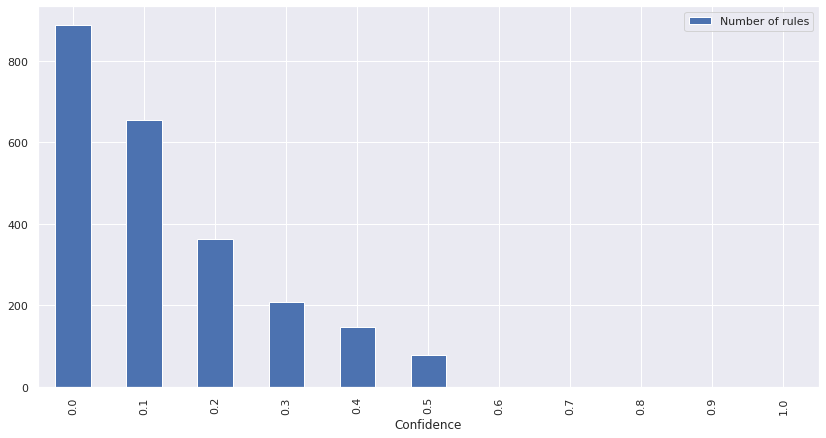

In [71]:
### rule status plot 

confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
number_of_rules = []

for i in confidence:
    a = get_confidence('status',i)
    number_of_rules.append(len(a))

    data = {'Confidence': confidence, 'Number of rules': number_of_rules}
df2 = pd.DataFrame(data=data)
print(df2)
plot = df2.plot.bar(x='Confidence', y='Number of rules')

/home/filipe/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    Confidence  Number of rules
0          0.0            17112
1          0.1            10972
2          0.2             7885
3          0.3             6213
4          0.4             5220
5          0.5             4065
6          0.6             3261
7          0.7             2769
8          0.8             2583
9          0.9             2149
10         1.0             1887


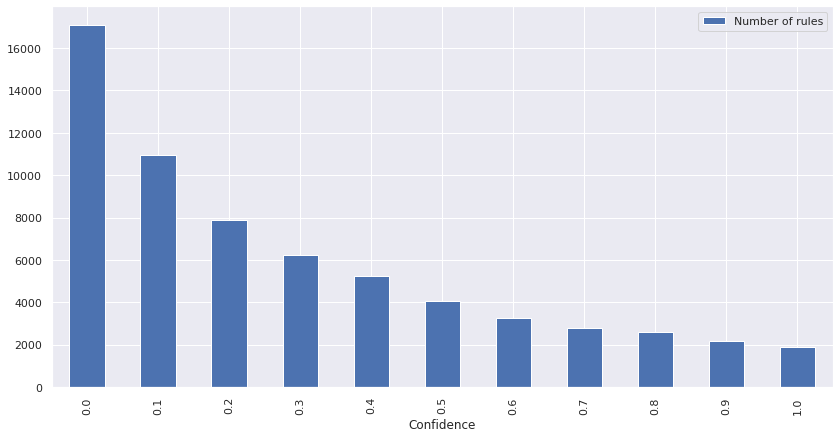

In [72]:
frequent_itemsets2 = apriori(computacao, min_support=0.005, use_colnames=True)
frequent_itemsets2

confidence = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
number_of_rules = []

for i in confidence:
    a = association_rules(frequent_itemsets2, metric="confidence", min_threshold=i)
    number_of_rules.append(len(a))

data = {'Confidence': confidence, 'Number of rules': number_of_rules}
df2 = pd.DataFrame(data=data)
print(df2)
plot = df2.plot.bar(x='Confidence', y='Number of rules')

In [73]:
rules = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.65)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         3096 non-null   object 
 1   consequents         3096 non-null   object 
 2   antecedent support  3096 non-null   float64
 3   consequent support  3096 non-null   float64
 4   support             3096 non-null   float64
 5   confidence          3096 non-null   float64
 6   lift                3096 non-null   float64
 7   leverage            3096 non-null   float64
 8   conviction          3096 non-null   float64
dtypes: float64(7), object(2)
memory usage: 217.8+ KB


In [74]:
# testee = df_posprocessing.drop(df_posprocessing['status'])
# testee.to_a

In [75]:
rules[['consequents']]#.filter(like='status', axis=1)

,consequents
0,(semestre_1)
1,(modalidade_Presencial)
2,(semestre_1)
3,(semestre_1)
4,(sexo_M)
...,...
3091,"(modalidade_Presencial, sexo_M, status_Matricu..."
3092,"(modalidade_Presencial, semestre_1, status_Mat..."
3093,"(modalidade_Presencial, sexo_M, semestre_1)"
3094,"(modalidade_Presencial, cor_Parda, semestre_1)"


In [76]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

aux = df_posprocessing.copy()
y = aux.pop('status').values
X = aux.values
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)
for train_index, test_index in kf.split(X):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = DecisionTreeClassifier(random_state=0)
    modelo = clf.fit(X_train, y_train)
    predicts = modelo.predict(X_test)
    
    #FAZER ACURACIA


KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [12727 12728 12729 ... 63632 63633 63634] TEST: [    0     1     2 ... 12724 12725 12726]
TRAIN: [    0     1     2 ... 63632 63633 63634] TEST: [12727 12728 12729 ... 25451 25452 25453]
TRAIN: [    0     1     2 ... 63632 63633 63634] TEST: [25454 25455 25456 ... 38178 38179 38180]
TRAIN: [    0     1     2 ... 63632 63633 63634] TEST: [38181 38182 38183 ... 50905 50906 50907]
TRAIN: [    0     1     2 ... 50905 50906 50907] TEST: [50908 50909 50910 ... 63632 63633 63634]


In [77]:
df_posprocessing

,ano,semestre,nascimento,status,renda,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,...,escolaridade_Pós-Graduação Lato Sensu,escolaridade_Pós-Graduação Stricto Sensu,escolaridade_Superior,cor_Amarela,cor_Branca,cor_Indígena,cor_Não dispõe da informação,cor_Não quis declarar cor/raça,cor_Parda,cor_Preta
0,0.428571,0.5,0.014911,Concluído,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.428571,0.5,0.016044,Concludente,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.428571,0.5,0.015100,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.428571,0.5,0.016799,Evasão,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.428571,0.5,0.015289,Concluído,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63630,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63631,0.500000,1.0,0.016610,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63632,0.500000,1.0,0.016233,Evasão,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63633,0.500000,1.0,0.016610,Evasão,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
help(rules[['consequents']].filter)

Help on method filter in module pandas.core.generic:

filter(items=None, like: 'str | None' = None, regex: 'str | None' = None, axis=None) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Subset the dataframe rows or columns according to the specified index labels.
    
    Note that this routine does not filter a dataframe on its
    contents. The filter is applied to the labels of the index.
    
    Parameters
    ----------
    items : list-like
        Keep labels from axis which are in items.
    like : str
        Keep labels from axis for which "like in label == True".
    regex : str (regular expression)
        Keep labels from axis for which re.search(regex, label) == True.
    axis : {0 or ‘index’, 1 or ‘columns’, None}, default None
        The axis to filter on, expressed either as an index (int)
        or axis name (str). By default this is the info axis,
        'index' for Series, 'columns' for DataFrame.
    
    Returns
    -------
    same type